# DEEPDIVE DJURGÅRDEN ALLSVENSKAN 2021

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import json
from collections import OrderedDict
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
from matplotlib.pyplot import rcParams
import seaborn as sns

# changed this to just use mplsoccer's pitch module
# from pitch import Pitch ##a helper function to quickly give us a pitch
import matplotlib.patheffects as pe 
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import FancyArrowPatch

from adjustText import adjust_text

from statsbombpy import sb

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Palatino Linotype'
 
import re

In [2]:
def create_filtered_dataframes(dataframe):
    # Create new dataframes and extract 'actions' into separate dataframes
    for index, row in djurgården.iterrows():
        hometeam = row['homeTeam'].lower().replace(" ", "")
        awayteam = row['visitingTeam'].lower().replace(" ", "")

        df_name = f'{hometeam}_{awayteam}_events'  # Create the new dataframe name
        events_df = pd.DataFrame(row['events'])  # Extract 'actions' into a new dataframe

        # Specify the desired column order
        column_order = [
            'external_id', 'action', 'team', 'player', 'xpos', 'ypos',
            'next_player', 'xdest', 'ydest', 'xt', 'game_time', 'start_time',
            'end_time', 'xg', 'xp', 'attack_type', 'penalty', 'header',
            'throw_in', 'goal_mouth']

        # Reorder the columns in the new dataframe
        events_df = events_df[column_order]


        globals()[df_name] = events_df  # Assign the new dataframe to a global variable with the created name
        print([df_name])


In [3]:
def create_passmap(game_events_half, title):
    
    pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

    fig, ax = pitch.draw(figsize=(13.5, 10))
    fig.set_facecolor('#22312b')
    ax.patch.set_facecolor('#22312b')
    pitch.draw(ax=ax)

    plt.gca().invert_yaxis
    
    
    
    
        
    for x in range(len(game_events_half.loc[game_events_half['team']=='Djurgården'])):
        if game_events_half.action[x] == 'Shot':
            plt.plot((game_events_half['xpos'][x], game_events_half['xdest'][x]),
                     (game_events_half['ypos'][x], game_events_half['ydest'][x]), color="red")
            plt.scatter(game_events_half['xpos'][x],(game_events_half['ypos'][x]), color='red')

    for x in range(len(game_events_half.loc[game_events_half['team']=='Djurgården'])):
        if game_events_half.action[x] == 'Shot on target':
            plt.plot((game_events_half['xpos'][x], game_events_half['xdest'][x]),
                     (game_events_half['ypos'][x], game_events_half['ydest'][x]), color="blue")
            plt.scatter(game_events_half['xpos'][x],(game_events_half['ypos'][x]), color='blue')

    for x in range(len(game_events_half.loc[game_events_half['team']=='Djurgården'])):
        if game_events_half.action[x] == 'Goal':
            plt.plot((game_events_half['xpos'][x], game_events_half['xdest'][x]),
                     (game_events_half['ypos'][x], game_events_half['ydest'][x]), color="yellow")
            plt.scatter(game_events_half['xpos'][x],(game_events_half['ypos'][x]), color='yellow')

    # Filter the data
    filtered_data = game_events_half.loc[
        (game_events_half['team'] == 'Djurgården') &
        (game_events_half['action'].isin(['Shot']))]    

    # Add the text box
    value_counts = filtered_data.player.value_counts()
    text = "Shots\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
    plt.text(0, 80, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))

    plt.title(title, color='white', fontsize=24)
    plt.show()


# The red dots are showing where the passes were made!

### Creating a JSON-file with only Djurgården games

In [ ]:
# Directory path and search term
directory = "/Users/axelreman/Documents/Nod Coding Bootcamp/Projects/Project_3_Data_VIZ/Allsvenskan_2021/"
search_term = "Dju"

# Initialize an empty list to store the merged data
djurgården_data = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json") and search_term in filename:
        file_path = os.path.join(directory, filename)
        with open(file_path) as file:
            # Load the JSON data from each file
            data = json.load(file)
            # Append the data to the merged_data list
            djurgården_data.append(data)

# Write the merged data to a new file
output_path = "/Users/axelreman/Documents/Nod Coding Bootcamp/Projects/Project_3_Data_VIZ/Allsvenskan_2021/djurgården_data.json"
with open(output_path, "w") as outfile:
    json.dump(djurgården_data, outfile)

print("Merging complete. Merged data saved to", output_path)


### All games

In [ ]:
# Directory path and search term
directory = "/Users/axelreman/Documents/Nod Coding Bootcamp/Projects/Project_3_Data_VIZ/Allsvenskan_2021/"

# Initialize an empty list to store the merged data
allsvenskan_data = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.startswith("wyId_"):
        file_path = os.path.join(directory, filename)
        with open(file_path) as file:
            # Load the JSON data from each file
            data = json.load(file)
            # Append the data to the merged_data list
            allsvenskan_data.append(data)

# Write the merged data to a new file
output_path = "/Users/axelreman/Documents/Nod Coding Bootcamp/Projects/Project_3_Data_VIZ/Allsvenskan_2021/allsvenskan_data.json"
with open(output_path, "w") as outfile:
    json.dump(allsvenskan_data, outfile)

print("Merging complete. Merged data saved to", output_path)


In [86]:
allsvenskan = pd.read_json("/Users/axelreman/Documents/Nod Coding Bootcamp/Projects/Project_3_Data_VIZ/Allsvenskan_2021/allsvenskan_data.json")


### Reading in the Djurgården game files into one dataframe

In [5]:
djurgården = pd.read_json("/Users/axelreman/Documents/Nod Coding Bootcamp/Projects/Project_3_Data_VIZ/Allsvenskan_2021/djurgården_data.json")

djurgården.sort_values(by="date", inplace=True, ignore_index=True)

In [6]:
djurgården

,visitingTeam,season,homeTeam,xG,events,season_id,score,eid,date,id
0,Djurgården,"Allsvenskan, 2021",Elfsborg,"[0.8089085268723128, 0.6133761292094393]","[{'xdest': 32, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[0, 2]",None,2021-04-11 15:30:00,634aa43e17d5d46fdfb430b5
1,IFK Norrköping,"Allsvenskan, 2021",Djurgården,"[2.615381881379097, 0.6940386191159382]","[{'xdest': 34, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[1, 0]",None,2021-04-18 15:30:00,634aa3a517d5d46fdfb4301e
2,Djurgården,"Allsvenskan, 2021",Varberg,"[0.2570877757229472, 2.4821393396793225]","[{'xdest': 38, 'xpos': 51, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[1, 3]",None,2021-04-25 13:00:00,634aa45f17d5d46fdfb430cb
3,Malmö FF,"Allsvenskan, 2021",Djurgården,"[2.601558069377096, 0.3841344865641271]","[{'attack_type': 'Counter', 'xdest': 33, 'xpos...",634aa35d17d5d46fdfb42e35,"[3, 1]",None,2021-05-03 16:30:00,634aa3fe17d5d46fdfb43080
4,Djurgården,"Allsvenskan, 2021",Degerfors,"[1.2493000303539472, 1.0787108208497262]","[{'xdest': 33, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[2, 0]",None,2021-05-09 13:00:00,634aa36a17d5d46fdfb42f12
5,Östersunds FK,"Allsvenskan, 2021",Djurgården,"[2.7203013790462394, 0.23687463362390054]","[{'xdest': 38, 'xpos': 49, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[2, 0]",None,2021-05-12 16:30:00,634aa3dd17d5d46fdfb43064
6,Djurgården,"Allsvenskan, 2021",Hammarby,"[1.9589170636343427, 1.690381276450083]","[{'xdest': 32, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[2, 2]",None,2021-05-16 15:30:00,634aa45917d5d46fdfb430c7
7,IFK Göteborg,"Allsvenskan, 2021",Djurgården,"[0.6754182656396431, 1.215795507426337]","[{'attack_type': 'Counter', 'xdest': 33, 'xpos...",634aa35d17d5d46fdfb42e35,"[0, 0]",None,2021-05-23 15:30:00,634aa37417d5d46fdfb42f77
8,Örebro,"Allsvenskan, 2021",Djurgården,"[3.9678342244116642, 0.37978099803190213]","[{'xdest': 37, 'xpos': 49, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[3, 0]",None,2021-07-05 17:00:00,634aa36917d5d46fdfb42f0e
9,Djurgården,"Allsvenskan, 2021",Halmstad,"[0.4984850017943992, 0.4825087155712052]","[{'attack_type': 'Counter', 'xdest': 32, 'xpos...",634aa35d17d5d46fdfb42e35,"[0, 0]",None,2021-07-12 17:00:00,634aa44e17d5d46fdfb430c0


In [87]:
allsvenskan

,visitingTeam,season,homeTeam,xG,events,season_id,score,eid,date,id
0,Varberg,"Allsvenskan, 2021",Elfsborg,"[0.3213971260314543, 1.1122177262097657]","[{'xdest': 28, 'xpos': 51, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[0, 0]",None,2021-11-06 14:00:00,634aa49717d5d46fdfb430f6
1,Degerfors,"Allsvenskan, 2021",Sirius,"[1.2314604431821015, 1.274201530855382]","[{'xdest': None, 'xpos': 71, 'header': False, ...",634aa35d17d5d46fdfb42e35,"[2, 0]",None,2021-07-24 15:30:00,634aa45417d5d46fdfb430c4
2,Hammarby,"Allsvenskan, 2021",Östersunds FK,"[0.5288740386842136, 1.2216108760166149]","[{'xdest': 27, 'xpos': 51, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[1, 1]",None,2021-08-01 15:30:00,634aa46f17d5d46fdfb430d8
3,Degerfors,"Allsvenskan, 2021",Mjällby,"[3.0226171500352006, 0.34613320491157007]","[{'xdest': 27, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[1, 0]",None,2021-05-03 16:30:00,634aa4a817d5d46fdfb43102
4,Örebro,"Allsvenskan, 2021",Djurgården,"[3.9678342244116642, 0.37978099803190213]","[{'xdest': 37, 'xpos': 49, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[3, 0]",None,2021-07-05 17:00:00,634aa36917d5d46fdfb42f0e
...,...,...,...,...,...,...,...,...,...,...
235,Östersunds FK,"Allsvenskan, 2021",Degerfors,"[1.2533503504512105, 1.99008006184011]","[{'xdest': 31, 'xpos': 49, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[3, 1]",None,2021-07-03 15:30:00,634aa3a717d5d46fdfb43020
236,IFK Göteborg,"Allsvenskan, 2021",Hammarby,"[1.7877324913505777, 0.401812249719146]","[{'xdest': 41, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[3, 0]",None,2021-09-23 17:00:00,634aa38417d5d46fdfb42fc2
237,Djurgården,"Allsvenskan, 2021",Östersunds FK,"[0.3147835704584982, 1.0263868241037575]","[{'xdest': 37, 'xpos': 51, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[0, 3]",None,2021-09-26 13:00:00,634aa47a17d5d46fdfb430e2
238,AIK,"Allsvenskan, 2021",Varberg,"[0.24754200705464346, 2.052602125186041]","[{'xdest': 34, 'xpos': 50, 'header': False, 'n...",634aa35d17d5d46fdfb42e35,"[0, 1]",None,2021-11-21 16:30:00,634aa45a17d5d46fdfb430c8


### Each individual game file Dataframe

In [7]:
# Create new dataframes based on the name and location columns
for index, row in djurgården.iterrows():
    hometeam = row['homeTeam'].lower().replace(" ", "")
    awayteam = row['visitingTeam'].lower().replace(" ", "")
    df_name = f'df_{hometeam}_{awayteam}'  # Create the new dataframe name
    df = pd.DataFrame([row])  # Create a new dataframe with the current row
    globals()[df_name] = df  # Assign the new dataframe to a global variable with the created name
    print([df_name])


['df_elfsborg_djurgården']
['df_djurgården_ifknorrköping']
['df_varberg_djurgården']
['df_djurgården_malmöff']
['df_degerfors_djurgården']
['df_djurgården_östersundsfk']
['df_hammarby_djurgården']
['df_djurgården_ifkgöteborg']
['df_djurgården_örebro']
['df_halmstad_djurgården']
['df_djurgården_sirius']
['df_kalmar_djurgården']
['df_djurgården_häcken']
['df_djurgården_aik']
['df_mjällby_djurgården']
['df_djurgården_mjällby']
['df_sirius_djurgården']
['df_djurgården_hammarby']
['df_malmöff_djurgården']
['df_djurgården_degerfors']
['df_östersundsfk_djurgården']
['df_aik_djurgården']
['df_djurgården_elfsborg']
['df_djurgården_kalmar']
['df_ifkgöteborg_djurgården']
['df_örebro_djurgården']
['df_djurgården_halmstad']
['df_ifknorrköping_djurgården']
['df_djurgården_varberg']
['df_häcken_djurgården']


In [ ]:
# Vilka gjorde flest mål, assist? 

# plats på mål? 

# avgörande passningar?

### Expanding the events of the game to its' own Dataframe

#### Splitting the events into two halves

In [8]:
create_filtered_dataframes(djurgården)

['elfsborg_djurgården_events']
['djurgården_ifknorrköping_events']
['varberg_djurgården_events']
['djurgården_malmöff_events']
['degerfors_djurgården_events']
['djurgården_östersundsfk_events']
['hammarby_djurgården_events']
['djurgården_ifkgöteborg_events']
['djurgården_örebro_events']
['halmstad_djurgården_events']
['djurgården_sirius_events']
['kalmar_djurgården_events']
['djurgården_häcken_events']
['djurgården_aik_events']
['mjällby_djurgården_events']
['djurgården_mjällby_events']
['sirius_djurgården_events']
['djurgården_hammarby_events']
['malmöff_djurgården_events']
['djurgården_degerfors_events']
['östersundsfk_djurgården_events']
['aik_djurgården_events']
['djurgården_elfsborg_events']
['djurgården_kalmar_events']
['ifkgöteborg_djurgården_events']
['örebro_djurgården_events']
['djurgården_halmstad_events']
['ifknorrköping_djurgården_events']
['djurgården_varberg_events']
['häcken_djurgården_events']


In [10]:
# Print the new DataFrame

column_order = (['external_id', 
                'action', 
                'team',
                'player', 
                'xpos', 
                'ypos', 
                'next_player', 
                'xdest', 
                'ydest', 
                'xt',
                'game_time',
                'start_time', 
                'end_time', 
                'xg', 
                'xp', 
                'attack_type',
                'penalty',
                'header',
                'throw_in', 
                'goal_mouth'])

elfsborg_djurgården_events = elfsborg_djurgården_events[column_order]

elfsborg_djurgården_events1 = elfsborg_djurgården_events.iloc[:1369]
elfsborg_djurgården_events2 = elfsborg_djurgården_events.iloc[1370:]

elfsborg_djurgården_events2.reset_index(drop=True, inplace=True)

In [11]:
# The code for finding half time kickoff.
# If the minute 45 has a pass from roughly the coordinates 50,50, it was a kickoff.

elfsborg_djurgården_events.loc[elfsborg_djurgården_events.xpos < 52].loc[elfsborg_djurgården_events.ypos < 52].loc[elfsborg_djurgården_events.xpos > 48].loc[elfsborg_djurgården_events.ypos > 48]

,external_id,action,team,player,xpos,ypos,next_player,xdest,ydest,xt,game_time,start_time,end_time,xg,xp,attack_type,penalty,header,throw_in,goal_mouth
0,1,Pass accurate,Djurgården,C. Edwards,50,51,J. Une Larsson,32.0,54.0,-0.004593,0,2,5,NaN,0.882111,NaN,False,False,False,NaN
339,340,Pass accurate,Elfsborg,R. Gojani,51,49,M. Jarjué,31.0,46.0,-0.005208,12,727,730,NaN,0.891393,NaN,False,False,False,NaN
1370,1371,Pass accurate,Elfsborg,R. Gojani,50,50,J. Okumu,30.0,53.0,-0.005630,45,2703,2706,NaN,0.906948,NaN,False,False,False,NaN
1782,1783,Pass accurate,Elfsborg,R. Gojani,50,51,J. Okumu,30.0,62.0,-0.005973,57,3439,3442,NaN,0.907752,NaN,False,False,False,NaN
2567,2569,Interception successful,Elfsborg,C. Mcvey,50,51,M. Jarjué,NaN,NaN,NaN,89,5388,5392,NaN,NaN,NaN,False,False,False,NaN
2568,2570,Pass accurate,Elfsborg,C. Mcvey,50,51,M. Jarjué,34.0,75.0,-0.005443,89,5388,5392,NaN,0.883970,NaN,False,False,False,NaN


# GAME 1

### Plotting first half passes

In [13]:
elfsborg_djurgården_events1.xpos = (elfsborg_djurgården_events1.xpos)*1.2
elfsborg_djurgården_events1.ypos = (elfsborg_djurgården_events1.ypos)*0.8
elfsborg_djurgården_events1.xdest = (elfsborg_djurgården_events1.xdest)*1.2
elfsborg_djurgården_events1.ydest = (elfsborg_djurgården_events1.ydest)*0.8

elfsborg_djurgården_events2.xpos = (elfsborg_djurgården_events2.xpos)*1.2
elfsborg_djurgården_events2.ypos = (elfsborg_djurgården_events2.ypos)*0.8
elfsborg_djurgården_events2.xdest = (elfsborg_djurgården_events2.xdest)*1.2
elfsborg_djurgården_events2.ydest = (elfsborg_djurgården_events2.ydest)*0.8

/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/154541357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elfsborg_djurgården_events1.xpos = (elfsborg_djurgården_events1.xpos)*1.2
/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/154541357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elfsborg_djurgården_events1.ypos = (elfsborg_djurgården_events1.ypos)*0.8
/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/154541357.py:3: SettingWithCopyWarning: 
A va

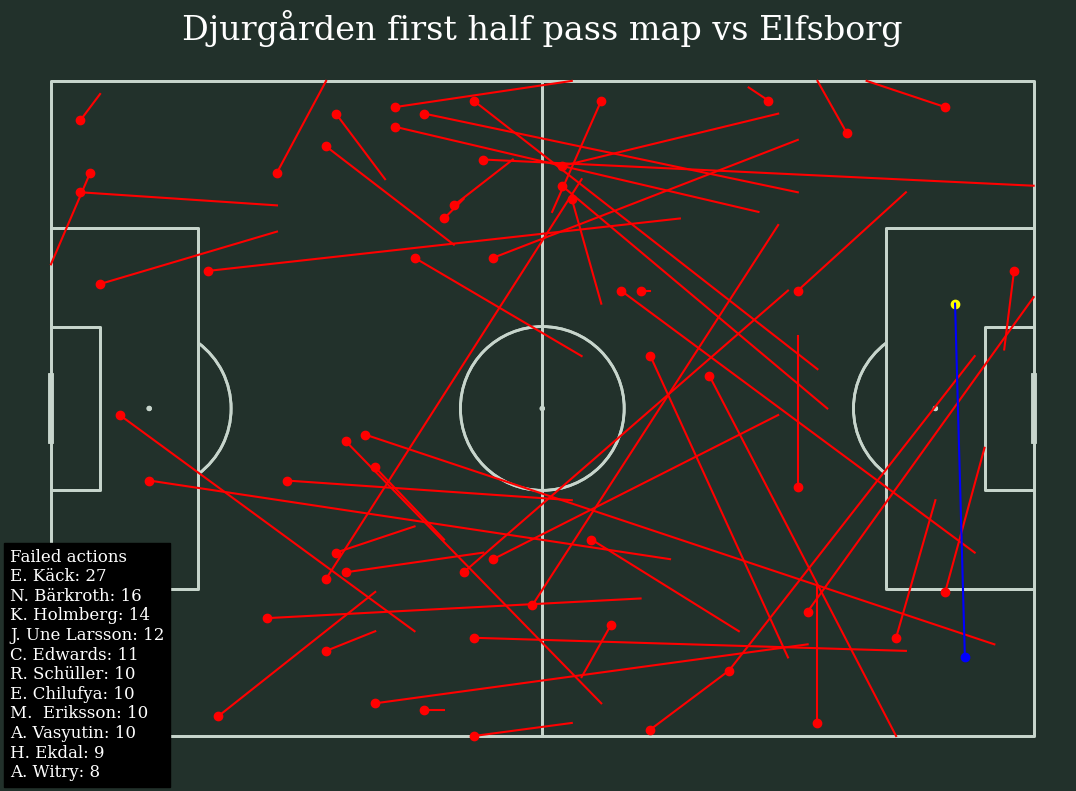

In [15]:
pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

plt.gca().invert_yaxis

#for x in range(len(elfdju_events1.loc[elfdju_events1['team']=='Djurgården'])):
#    if elfdju_events1.action[x] == 'Pass accurate':
#        plt.plot((elfdju_events1['xpos'][x], elfdju_events1['xdest'][x]),
#                 (elfdju_events1['ypos'][x], elfdju_events1['ydest'][x]), color="green")
#        plt.scatter(elfdju_events1['xpos'][x],(elfdju_events1['ypos'][x]), color='green')
        
for x in range(len(elfsborg_djurgården_events1.loc[elfsborg_djurgården_events1['team']=='Djurgården'])):
    if elfsborg_djurgården_events1.action[x] == 'Pass inaccurate':
        plt.plot((elfsborg_djurgården_events1['xpos'][x], elfsborg_djurgården_events1['xdest'][x]),
                 (elfsborg_djurgården_events1['ypos'][x], elfsborg_djurgården_events1['ydest'][x]), color="red")
        plt.scatter(elfsborg_djurgården_events1['xpos'][x],(elfsborg_djurgården_events1['ypos'][x]), color='red')
        
for x in range(len(elfsborg_djurgården_events1.loc[elfsborg_djurgården_events1['team']=='Djurgården'])):
    if elfsborg_djurgården_events1.action[x] == 'Assist':
        plt.plot((elfsborg_djurgården_events1['xpos'][x], elfsborg_djurgården_events1['xdest'][x]),
                 (elfsborg_djurgården_events1['ypos'][x], elfsborg_djurgården_events1['ydest'][x]), color="blue")
        plt.scatter(elfsborg_djurgården_events1['xpos'][x],(elfsborg_djurgården_events1['ypos'][x]), color='blue')
        
for x in range(len(elfsborg_djurgården_events1.loc[elfsborg_djurgården_events1['team']=='Djurgården'])):
    if elfsborg_djurgården_events1.action[x] == 'Goal':
        plt.scatter(elfsborg_djurgården_events1['xpos'][x],(elfsborg_djurgården_events1['ypos'][x]), color='yellow')

# Filter the data
filtered_data = elfsborg_djurgården_events1.loc[
    (elfsborg_djurgården_events1['team'] == 'Djurgården') &
    (elfsborg_djurgården_events1['action'].isin(['Pass inaccurate', 'Lost ball', 'Bad ball control']))]    
    
# Add the text box
value_counts = filtered_data.player.value_counts()
text = "Failed actions\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
plt.text(-5, 85, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))
    
        
plt.title("Djurgården first half pass map vs Elfsborg", color='white', fontsize=24)
plt.show()


# The red dots are showing where the passes were made!

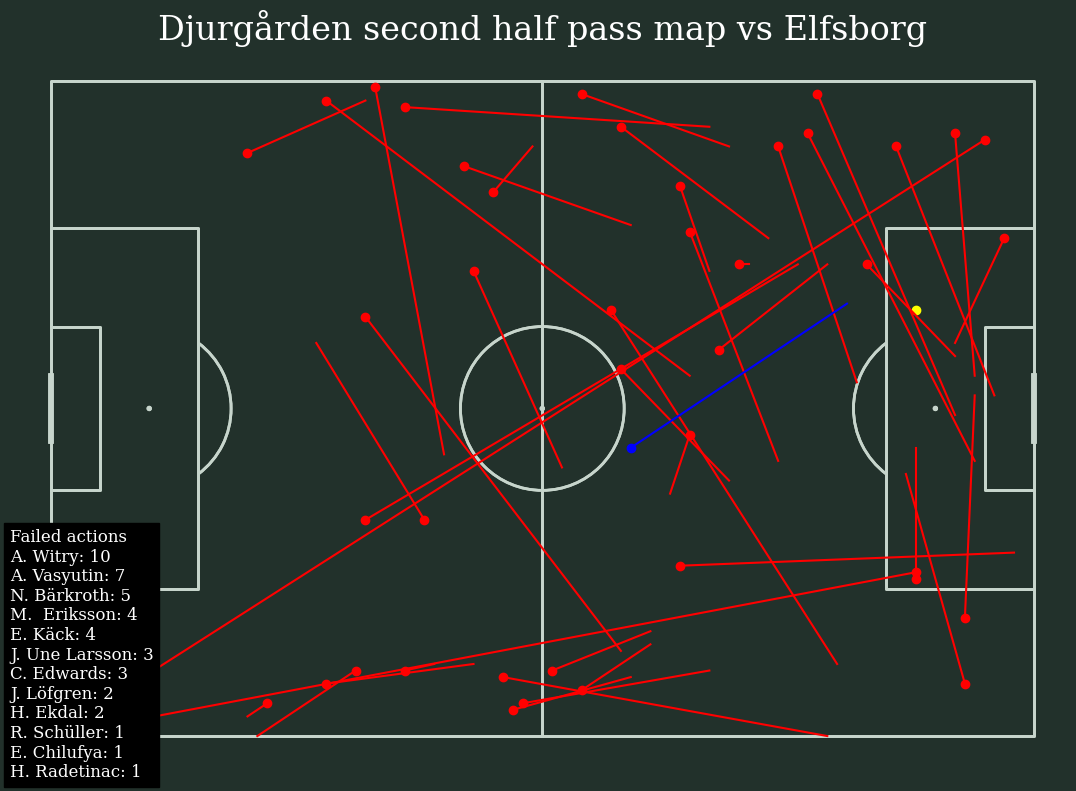

In [16]:
pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

plt.gca().invert_yaxis

        
for x in range(len(elfsborg_djurgården_events2.loc[elfsborg_djurgården_events2['team']=='Djurgården'])):
    if elfsborg_djurgården_events2.action[x] == 'Pass inaccurate':
        plt.plot((elfsborg_djurgården_events2['xpos'][x], elfsborg_djurgården_events2['xdest'][x]),
                 (elfsborg_djurgården_events2['ypos'][x], elfsborg_djurgården_events2['ydest'][x]), color="red")
        plt.scatter(elfsborg_djurgården_events2['xpos'][x],(elfsborg_djurgården_events2['ypos'][x]), color='red')
        
for x in range(len(elfsborg_djurgården_events2.loc[elfsborg_djurgården_events2['team']=='Djurgården'])):
    if elfsborg_djurgården_events2.action[x] == 'Assist':
        plt.plot((elfsborg_djurgården_events2['xpos'][x], elfsborg_djurgården_events2['xdest'][x]),
                 (elfsborg_djurgården_events2['ypos'][x], elfsborg_djurgården_events2['ydest'][x]), color="blue")
        plt.scatter(elfsborg_djurgården_events2['xpos'][x],(elfsborg_djurgården_events2['ypos'][x]), color='blue')
        
for x in range(len(elfsborg_djurgården_events2.loc[elfsborg_djurgården_events2['team']=='Djurgården'])):
    if elfsborg_djurgården_events2.action[x] == 'Goal':
        plt.scatter(elfsborg_djurgården_events2['xpos'][x],(elfsborg_djurgården_events2['ypos'][x]), color='yellow')

# Filter the data
filtered_data = elfsborg_djurgården_events2.loc[
    (elfsborg_djurgården_events2['team'] == 'Djurgården') &
    (elfsborg_djurgården_events2['action'].isin(['Pass inaccurate']))]    
    
# Add the text box
value_counts = filtered_data.player.value_counts()
text = "Failed actions\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
plt.text(-5, 85, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))
    
        
plt.title("Djurgården second half pass map vs Elfsborg", color='white', fontsize=24)
plt.show()


# The red dots are showing where the passes were made!

# GAME 2

In [ ]:
djurgården_ifknorrköping_events.loc[djurgården_ifknorrköping_events.xpos>45].loc[djurgården_ifknorrköping_events.ypos>45].loc[djurgården_ifknorrköping_events.xpos<55].loc[djurgården_ifknorrköping_events.ypos<55]

In [17]:
djurgården_ifknorrköping_events1 = djurgården_ifknorrköping_events.iloc[:1257]
djurgården_ifknorrköping_events2 = djurgården_ifknorrköping_events.iloc[1258:]
djurgården_ifknorrköping_events2.reset_index(drop=True, inplace=True)

In [18]:
djurgården_ifknorrköping_events1.xpos = (elfsborg_djurgården_events1.xpos)*1.2
djurgården_ifknorrköping_events1.ypos = (elfsborg_djurgården_events1.ypos)*0.8
djurgården_ifknorrköping_events1.xdest = (elfsborg_djurgården_events1.xdest)*1.2
djurgården_ifknorrköping_events1.ydest = (elfsborg_djurgården_events1.ydest)*0.8

djurgården_ifknorrköping_events2.xpos = (elfsborg_djurgården_events2.xpos)*1.2
djurgården_ifknorrköping_events2.ypos = (elfsborg_djurgården_events2.ypos)*0.8
djurgården_ifknorrköping_events2.xdest = (elfsborg_djurgården_events2.xdest)*1.2
djurgården_ifknorrköping_events2.ydest = (elfsborg_djurgården_events2.ydest)*0.8

/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/2135245899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djurgården_ifknorrköping_events1.xpos = (elfsborg_djurgården_events1.xpos)*1.2
/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/2135245899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djurgården_ifknorrköping_events1.ypos = (elfsborg_djurgården_events1.ypos)*0.8
/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/2135245899.py:3: SettingWithCopyW

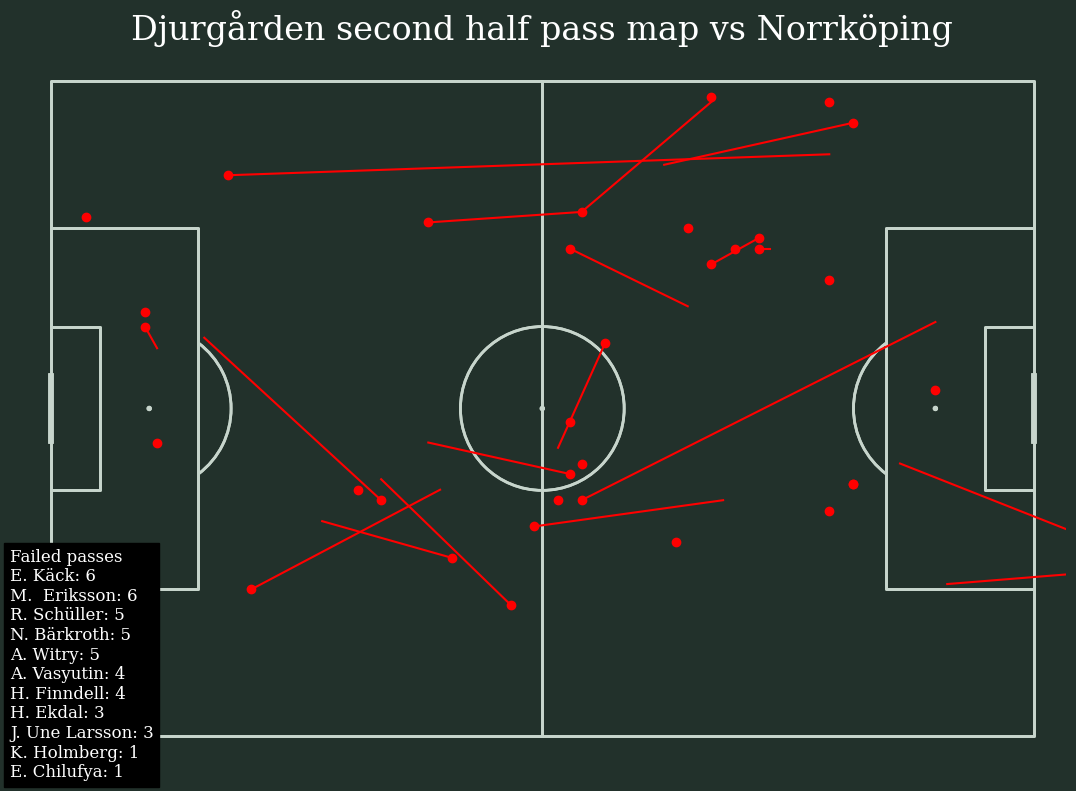

In [26]:
pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

plt.gca().invert_yaxis

        
for x in range(len(djurgården_ifknorrköping_events1.loc[djurgården_ifknorrköping_events1['team']=='Djurgården'])):
    if djurgården_ifknorrköping_events1.action[x] == 'Pass inaccurate':
        plt.plot((djurgården_ifknorrköping_events1['xpos'][x], djurgården_ifknorrköping_events1['xdest'][x]),
                 (djurgården_ifknorrköping_events1['ypos'][x], djurgården_ifknorrköping_events1['ydest'][x]), color="red")
        plt.scatter(djurgården_ifknorrköping_events1['xpos'][x],(djurgården_ifknorrköping_events1['ypos'][x]), color='red')
        
for x in range(len(djurgården_ifknorrköping_events1.loc[djurgården_ifknorrköping_events1['team']=='Djurgården'])):
    if djurgården_ifknorrköping_events1.action[x] == 'Assist':
        plt.plot((djurgården_ifknorrköping_events1['xpos'][x], djurgården_ifknorrköping_events1['xdest'][x]),
                 (djurgården_ifknorrköping_events1['ypos'][x], djurgården_ifknorrköping_events1['ydest'][x]), color="blue")
        plt.scatter(djurgården_ifknorrköping_events1['xpos'][x],(djurgården_ifknorrköping_events1['ypos'][x]), color='blue')
        
for x in range(len(djurgården_ifknorrköping_events1.loc[djurgården_ifknorrköping_events1['team']=='Djurgården'])):
    if djurgården_ifknorrköping_events1.action[x] == 'Goal':
        plt.scatter(djurgården_ifknorrköping_events1['xpos'][x],(djurgården_ifknorrköping_events1['ypos'][x]), color='yellow')

# Filter the data
filtered_data = djurgården_ifknorrköping_events1.loc[
    (djurgården_ifknorrköping_events1['team'] == 'Djurgården') &
    (djurgården_ifknorrköping_events1['action'].isin(['Pass inaccurate']))]    
    
# Add the text box
value_counts = filtered_data.player.value_counts()
text = "Failed passes\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
plt.text(-5, 85, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))
    
        
plt.title("Djurgården second half pass map vs Norrköping", color='white', fontsize=24)
plt.show()


# The red dots are showing where the passes were made!

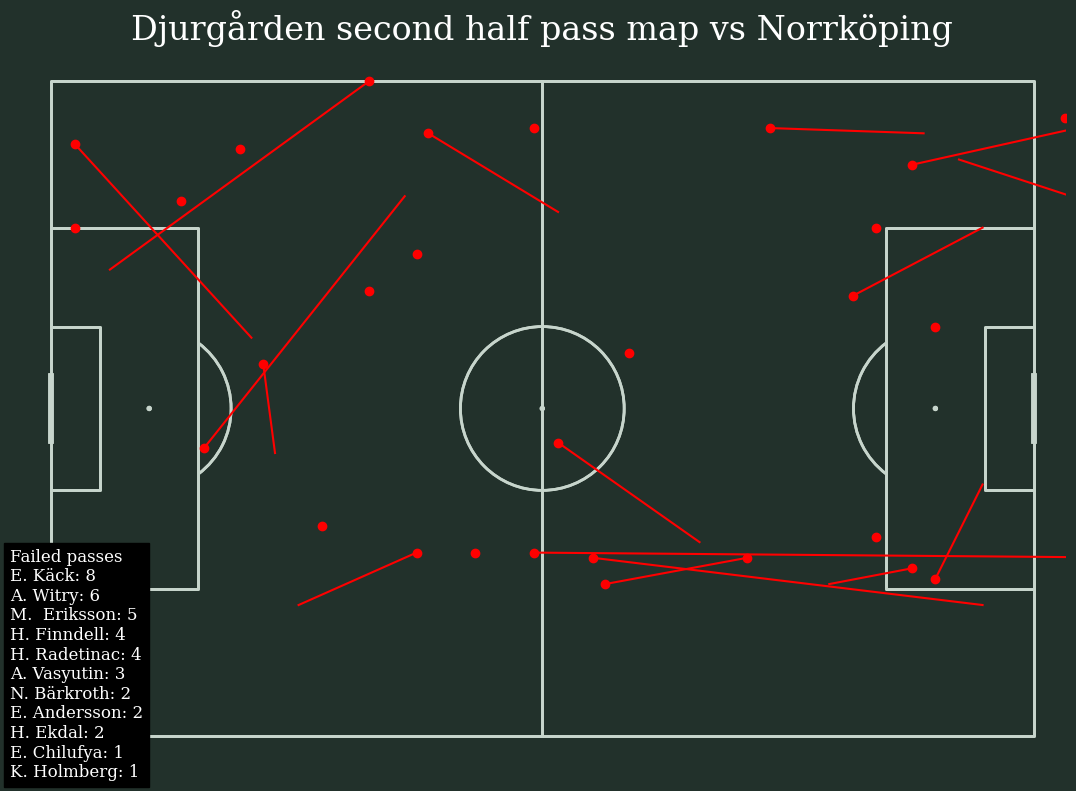

In [27]:
pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

plt.gca().invert_yaxis

#for x in range(len(elfdju_events1.loc[elfdju_events1['team']=='Djurgården'])):
#    if elfdju_events1.action[x] == 'Pass accurate':
#        plt.plot((elfdju_events1['xpos'][x], elfdju_events1['xdest'][x]),
#                 (elfdju_events1['ypos'][x], elfdju_events1['ydest'][x]), color="green")
#        plt.scatter(elfdju_events1['xpos'][x],(elfdju_events1['ypos'][x]), color='green')
        
for x in range(len(djurgården_ifknorrköping_events2.loc[djurgården_ifknorrköping_events2['team']=='Djurgården'])):
    if djurgården_ifknorrköping_events2.action[x] == 'Pass inaccurate':
        plt.plot((djurgården_ifknorrköping_events2['xpos'][x], djurgården_ifknorrköping_events2['xdest'][x]),
                 (djurgården_ifknorrköping_events2['ypos'][x], djurgården_ifknorrköping_events2['ydest'][x]), color="red")
        plt.scatter(djurgården_ifknorrköping_events2['xpos'][x],(djurgården_ifknorrköping_events2['ypos'][x]), color='red')
        
for x in range(len(djurgården_ifknorrköping_events2.loc[djurgården_ifknorrköping_events2['team']=='Djurgården'])):
    if djurgården_ifknorrköping_events2.action[x] == 'Assist':
        plt.plot((djurgården_ifknorrköping_events2['xpos'][x], djurgården_ifknorrköping_events2['xdest'][x]),
                 (djurgården_ifknorrköping_events2['ypos'][x], djurgården_ifknorrköping_events2['ydest'][x]), color="blue")
        plt.scatter(djurgården_ifknorrköping_events2['xpos'][x],(djurgården_ifknorrköping_events2['ypos'][x]), color='blue')
        
for x in range(len(djurgården_ifknorrköping_events2.loc[djurgården_ifknorrköping_events2['team']=='Djurgården'])):
    if djurgården_ifknorrköping_events2.action[x] == 'Goal':
        plt.scatter(djurgården_ifknorrköping_events2['xpos'][x],(djurgården_ifknorrköping_events2['ypos'][x]), color='yellow')

# Filter the data
filtered_data = djurgården_ifknorrköping_events2.loc[
    (djurgården_ifknorrköping_events2['team'] == 'Djurgården') &
    (djurgården_ifknorrköping_events2['action'].isin(['Pass inaccurate']))]    
    
# Add the text box
value_counts = filtered_data.player.value_counts()
text = "Failed passes\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
plt.text(-5, 85, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))
    
        
plt.title("Djurgården second half pass map vs Norrköping", color='white', fontsize=24)
plt.show()


# The red dots are showing where the passes were made!

# GAME 3

In [28]:
varberg_djurgården_events.loc[
    varberg_djurgården_events.xpos>45].loc[
    varberg_djurgården_events.ypos>45].loc[
    varberg_djurgården_events.xpos<55].loc[
    varberg_djurgården_events.ypos<55]

,external_id,action,team,player,xpos,ypos,next_player,xdest,ydest,xt,game_time,start_time,end_time,xg,xp,attack_type,penalty,header,throw_in,goal_mouth
0,1,Pass accurate,Varberg,R. Tranberg,51,51,A. Ejupi,38.0,56.0,-0.003486,0,6,9,NaN,0.864949,NaN,False,False,False,NaN
38,43,Pass accurate,Varberg,J. Lindner,49,51,H. Zackrisson,42.0,54.0,-0.001139,1,84,85,NaN,0.860679,NaN,False,False,False,NaN
776,837,Pass accurate,Varberg,S. Karlsson Adjei,48,50,A. Ejupi,39.0,49.0,-0.001184,29,1796,1799,NaN,0.860679,NaN,False,False,False,NaN
1115,1206,Interception successful,Varberg,Jean Carlos,46,54,H. Ekdal,NaN,NaN,NaN,42,2532,2534,NaN,NaN,NaN,False,False,False,NaN
1116,1207,Pass accurate,Varberg,Jean Carlos,46,54,H. Ekdal,71.0,43.0,0.009619,42,2532,2534,NaN,0.620501,NaN,False,False,False,NaN
1171,1262,Pass accurate,Djurgården,K. Holmberg,49,49,E. Käck,31.0,65.0,-0.003750,45,2705,2709,NaN,0.938874,Counter,False,False,False,NaN
1277,1374,Pass accurate,Djurgården,M. Eriksson,46,48,E. Käck,53.0,79.0,0.000886,48,2911,2912,NaN,0.917276,Counter,False,False,False,NaN
1340,1437,Challenge unsuccessful,Djurgården,J. Löfgren,46,54,NaN,NaN,NaN,NaN,52,3131,3131,NaN,NaN,NaN,False,False,False,NaN
1341,1438,Air challenge unsuccessful,Djurgården,J. Löfgren,46,54,NaN,NaN,NaN,NaN,52,3131,3131,NaN,NaN,NaN,False,False,False,NaN
1402,1510,Pass accurate,Djurgården,R. Schüller,46,51,H. Ekdal,35.0,70.0,-0.003095,54,3273,3275,NaN,0.938666,Counter,False,False,False,NaN


In [29]:
varberg_djurgården_events1 = varberg_djurgården_events.iloc[:1170]
varberg_djurgården_events2 = varberg_djurgården_events.iloc[1171:]
varberg_djurgården_events2.reset_index(drop=True, inplace=True)

In [30]:
varberg_djurgården_events1.xpos = (varberg_djurgården_events1.xpos)*1.2
varberg_djurgården_events1.ypos = (varberg_djurgården_events1.ypos)*0.8
varberg_djurgården_events1.xdest = (varberg_djurgården_events1.xdest)*1.2
varberg_djurgården_events1.ydest = (varberg_djurgården_events1.ydest)*0.8

varberg_djurgården_events2.xpos = (varberg_djurgården_events2.xpos)*1.2
varberg_djurgården_events2.ypos = (varberg_djurgården_events2.ypos)*0.8
varberg_djurgården_events2.xdest = (varberg_djurgården_events2.xdest)*1.2
varberg_djurgården_events2.ydest = (varberg_djurgården_events2.ydest)*0.8

/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/4037870667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  varberg_djurgården_events1.xpos = (varberg_djurgården_events1.xpos)*1.2
/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/4037870667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  varberg_djurgården_events1.ypos = (varberg_djurgården_events1.ypos)*0.8
/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/4037870667.py:3: SettingWithCopyWarning: 
A val

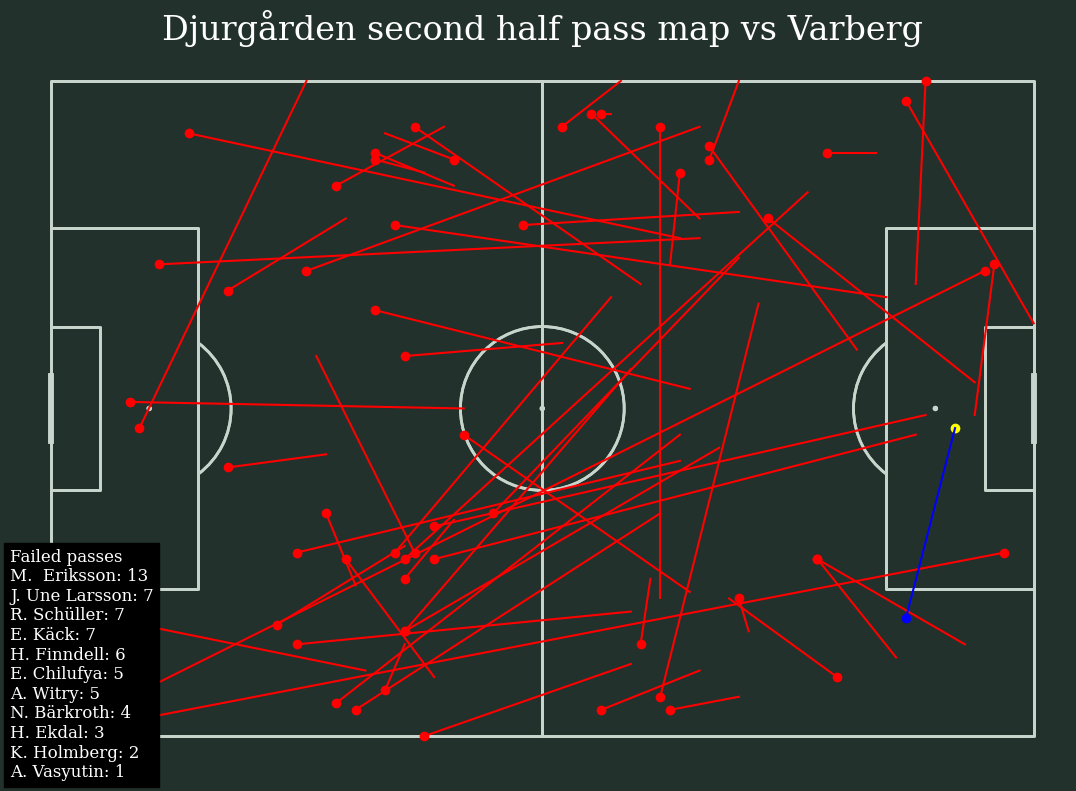

In [31]:
pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

plt.gca().invert_yaxis

#for x in range(len(elfdju_events1.loc[elfdju_events1['team']=='Djurgården'])):
#    if elfdju_events1.action[x] == 'Pass accurate':
#        plt.plot((elfdju_events1['xpos'][x], elfdju_events1['xdest'][x]),
#                 (elfdju_events1['ypos'][x], elfdju_events1['ydest'][x]), color="green")
#        plt.scatter(elfdju_events1['xpos'][x],(elfdju_events1['ypos'][x]), color='green')
        
for x in range(len(varberg_djurgården_events1.loc[varberg_djurgården_events1['team']=='Djurgården'])):
    if varberg_djurgården_events1.action[x] == 'Pass inaccurate':
        plt.plot((varberg_djurgården_events1['xpos'][x], varberg_djurgården_events1['xdest'][x]),
                 (varberg_djurgården_events1['ypos'][x], varberg_djurgården_events1['ydest'][x]), color="red")
        plt.scatter(varberg_djurgården_events1['xpos'][x],(varberg_djurgården_events1['ypos'][x]), color='red')
        
for x in range(len(varberg_djurgården_events1.loc[varberg_djurgården_events1['team']=='Djurgården'])):
    if varberg_djurgården_events1.action[x] == 'Assist':
        plt.plot((varberg_djurgården_events1['xpos'][x], varberg_djurgården_events1['xdest'][x]),
                 (varberg_djurgården_events1['ypos'][x], varberg_djurgården_events1['ydest'][x]), color="blue")
        plt.scatter(varberg_djurgården_events1['xpos'][x],(varberg_djurgården_events1['ypos'][x]), color='blue')
        
for x in range(len(varberg_djurgården_events1.loc[varberg_djurgården_events1['team']=='Djurgården'])):
    if varberg_djurgården_events1.action[x] == 'Goal':
        plt.scatter(varberg_djurgården_events1['xpos'][x],(varberg_djurgården_events1['ypos'][x]), color='yellow')

# Filter the data
filtered_data = varberg_djurgården_events1.loc[
    (varberg_djurgården_events1['team'] == 'Djurgården') &
    (varberg_djurgården_events1['action'].isin(['Pass inaccurate']))]    
    
# Add the text box
value_counts = filtered_data.player.value_counts()
text = "Failed passes\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
plt.text(-5, 85, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))
    
        
plt.title("Djurgården second half pass map vs Varberg", color='white', fontsize=24)
plt.show()


# The red dots are showing where the passes were made!

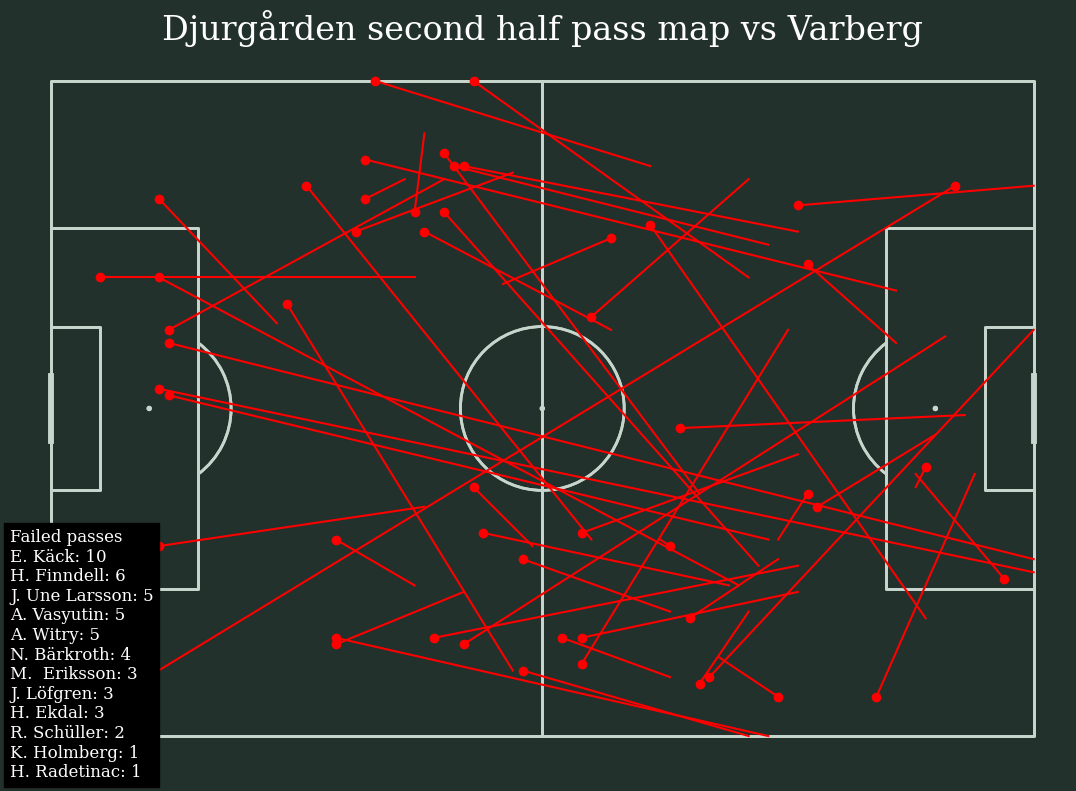

In [32]:
pitch = Pitch(pitch_type='statsbomb',
    half=False,
    pitch_color='#22312b',
    line_color="#c7d5cc")

fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch.draw(ax=ax)

plt.gca().invert_yaxis

for x in range(len(varberg_djurgården_events2.loc[varberg_djurgården_events2['team']=='Djurgården'])):
    if varberg_djurgården_events2.action[x] == 'Pass inaccurate':
        plt.plot((varberg_djurgården_events2['xpos'][x], varberg_djurgården_events2['xdest'][x]),
                 (varberg_djurgården_events2['ypos'][x], varberg_djurgården_events2['ydest'][x]), color="red")
        plt.scatter(varberg_djurgården_events2['xpos'][x],(varberg_djurgården_events2['ypos'][x]), color='red')
        
for x in range(len(varberg_djurgården_events2.loc[varberg_djurgården_events2['team']=='Djurgården'])):
    if varberg_djurgården_events2.action[x] == 'Assist':
        plt.plot((varberg_djurgården_events2['xpos'][x], varberg_djurgården_events2['xdest'][x]),
                 (varberg_djurgården_events2['ypos'][x], varberg_djurgården_events2['ydest'][x]), color="blue")
        plt.scatter(varberg_djurgården_events2['xpos'][x],(varberg_djurgården_events2['ypos'][x]), color='blue')
        
for x in range(len(varberg_djurgården_events2.loc[varberg_djurgården_events2['team']=='Djurgården'])):
    if varberg_djurgården_events2.action[x] == 'Goal':
        plt.scatter(varberg_djurgården_events2['xpos'][x],(varberg_djurgården_events2['ypos'][x]), color='yellow')

# Filter the data
filtered_data = varberg_djurgården_events2.loc[
    (varberg_djurgården_events2['team'] == 'Djurgården') &
    (varberg_djurgården_events2['action'].isin(['Pass inaccurate']))]    
    
# Add the text box
value_counts = filtered_data.player.value_counts()
text = "Failed passes\n"+"\n".join(f"{player}: {count}" for player, count in value_counts.items())
plt.text(-5, 85, text, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=1))
    
plt.title("Djurgården second half pass map vs Varberg", color='white', fontsize=24)
plt.show()



# The red dots are showing where the passes were made!


# KANTSPELARNA BÖRJADE TAPPA MYCKET BOLL. TOG MER INITIATIV.

In [34]:
djurgården_malmöff_events

,external_id,action,team,player,xpos,ypos,next_player,xdest,ydest,xt,game_time,start_time,end_time,xg,xp,attack_type,penalty,header,throw_in,goal_mouth
0,1,Pass accurate,Malmö FF,A. Christiansen,49,51,F. Brorsson,33.0,59.0,-0.002245,0,0,2,NaN,0.933155,Counter,False,False,False,NaN
1,2,Pass accurate,Malmö FF,F. Brorsson,33,59,J. Knudsen,30.0,52.0,-0.001037,0,2,3,NaN,0.936943,Counter,False,False,False,NaN
2,3,Pass accurate,Malmö FF,J. Knudsen,30,52,J. Berget,75.0,6.0,0.015727,0,3,6,NaN,0.737938,Counter,False,False,False,NaN
3,4,Challenge successful,Malmö FF,J. Berget,75,6,E. Käck,NaN,NaN,NaN,0,6,7,NaN,NaN,Counter,False,False,False,NaN
4,5,Air challenge successful,Malmö FF,J. Berget,75,6,E. Käck,NaN,NaN,NaN,0,6,7,NaN,NaN,Counter,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,2604,Pass inaccurate,Malmö FF,A. Nalić,19,51,C. Edwards,25.0,84.0,NaN,95,5758,5759,NaN,0.814718,NaN,False,False,False,NaN
2582,2605,Lost ball,Malmö FF,A. Nalić,19,51,C. Edwards,NaN,NaN,NaN,95,5758,5759,NaN,NaN,NaN,False,False,False,NaN
2583,2606,Cross accurate,Djurgården,C. Edwards,75,16,E. Larsson,92.0,70.0,NaN,95,5759,5762,NaN,NaN,NaN,False,False,False,NaN
2584,2607,Pass accurate,Djurgården,C. Edwards,75,16,E. Larsson,92.0,70.0,0.007334,95,5759,5762,NaN,0.512917,NaN,False,False,False,NaN


/var/folders/5v/xsx00v7s2y7bxfk3tq7z9_4r0000gn/T/ipykernel_11643/987952902.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_positions = filtered_data.groupby('player').mean()[['xpos', 'ypos']]


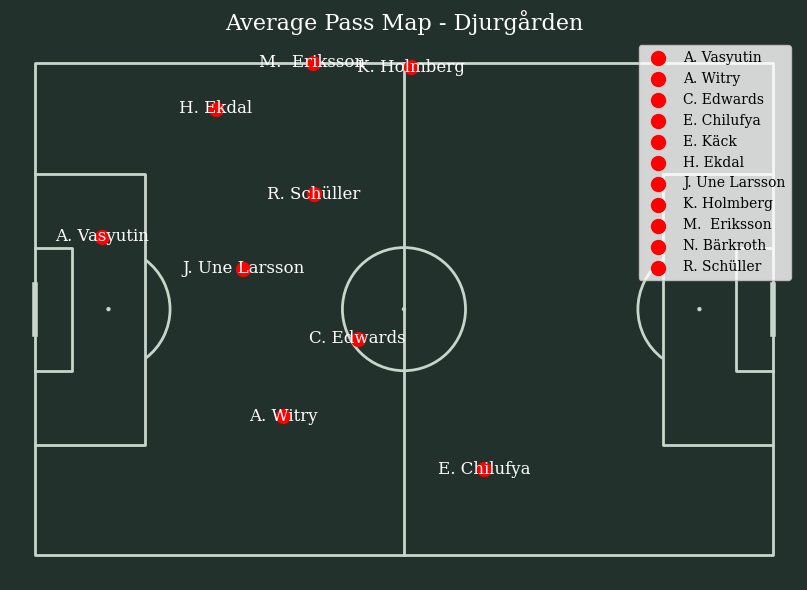

In [40]:
# Filter the data for successful passes by Djurgården players
filtered_data = elfsborg_djurgården_events.loc[(elfsborg_djurgården_events['team'] == 'Djurgården') & (elfsborg_djurgården_events['action'] == 'Pass accurate')& (elfsborg_djurgården_events['game_time'] <= 45)]

# Calculate the average position of each player
average_positions = filtered_data.groupby('player').mean()[['xpos', 'ypos']]

# Create the pitch
pitch = Pitch(pitch_type='statsbomb', half=False, pitch_color='#22312b', line_color="#c7d5cc")

# Plot the pitch
fig, ax = pitch.draw(figsize=(10, 6))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

# Plot the average positions
for player, position in average_positions.iterrows():
    x, y = position['xpos'], position['ypos']
    plt.scatter(x, y, color='red', s=100, label=player)
    plt.annotate(player, (x, y), color='white', fontsize=12, ha='center', va='center')

plt.title("Average Pass Map - Djurgården", color='white', fontsize=16)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [36]:
elfsborg_djurgården_events

,external_id,action,team,player,xpos,ypos,next_player,xdest,ydest,xt,game_time,start_time,end_time,xg,xp,attack_type,penalty,header,throw_in,goal_mouth
0,1,Pass accurate,Djurgården,C. Edwards,50,51,J. Une Larsson,32.0,54.0,-0.004593,0,2,5,NaN,0.882111,NaN,False,False,False,NaN
1,2,Pass inaccurate,Djurgården,J. Une Larsson,32,54,J. Larsson,96.0,86.0,NaN,0,5,10,NaN,0.275144,NaN,False,False,False,NaN
2,3,Lost ball,Djurgården,J. Une Larsson,32,54,J. Larsson,NaN,NaN,NaN,0,5,10,NaN,NaN,NaN,False,False,False,NaN
3,4,Pass inaccurate,Elfsborg,J. Larsson,4,14,NaN,0.0,28.0,NaN,0,10,12,NaN,0.916872,NaN,False,False,False,NaN
4,5,Right corner inaccurate,Djurgården,M. Eriksson,100,100,F. Holst,97.0,65.0,NaN,0,33,34,NaN,NaN,Corner,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,2702,Lost ball,Elfsborg,P. Frick,95,50,A. Vasyutin,NaN,NaN,NaN,93,5621,5621,NaN,NaN,NaN,False,False,False,NaN
2701,2703,Challenge unsuccessful,Djurgården,A. Vasyutin,5,50,A. Vasyutin,NaN,NaN,NaN,93,5621,5635,NaN,NaN,NaN,False,False,False,NaN
2702,2704,Air challenge unsuccessful,Djurgården,A. Vasyutin,5,50,A. Vasyutin,NaN,NaN,NaN,93,5621,5635,NaN,NaN,NaN,False,False,False,NaN
2703,2705,Pass accurate,Djurgården,A. Vasyutin,14,45,E. Banda,42.0,21.0,0.003011,93,5635,5640,NaN,0.746465,NaN,False,False,False,NaN


In [47]:
djurgården = djurgården[['season', 'homeTeam', 'visitingTeam', 'score', 'xG', 'events', 
       'eid', 'date', 'season_id','id']]

In [48]:
djurgården

,season,homeTeam,visitingTeam,score,xG,events,eid,date,season_id,id
0,"Allsvenskan, 2021",Elfsborg,Djurgården,"[0, 2]","[0.8089085268723128, 0.6133761292094393]","[{'xdest': 32, 'xpos': 50, 'header': False, 'n...",None,2021-04-11 15:30:00,634aa35d17d5d46fdfb42e35,634aa43e17d5d46fdfb430b5
1,"Allsvenskan, 2021",Djurgården,IFK Norrköping,"[1, 0]","[2.615381881379097, 0.6940386191159382]","[{'xdest': 34, 'xpos': 50, 'header': False, 'n...",None,2021-04-18 15:30:00,634aa35d17d5d46fdfb42e35,634aa3a517d5d46fdfb4301e
2,"Allsvenskan, 2021",Varberg,Djurgården,"[1, 3]","[0.2570877757229472, 2.4821393396793225]","[{'xdest': 38, 'xpos': 51, 'header': False, 'n...",None,2021-04-25 13:00:00,634aa35d17d5d46fdfb42e35,634aa45f17d5d46fdfb430cb
3,"Allsvenskan, 2021",Djurgården,Malmö FF,"[3, 1]","[2.601558069377096, 0.3841344865641271]","[{'attack_type': 'Counter', 'xdest': 33, 'xpos...",None,2021-05-03 16:30:00,634aa35d17d5d46fdfb42e35,634aa3fe17d5d46fdfb43080
4,"Allsvenskan, 2021",Degerfors,Djurgården,"[2, 0]","[1.2493000303539472, 1.0787108208497262]","[{'xdest': 33, 'xpos': 50, 'header': False, 'n...",None,2021-05-09 13:00:00,634aa35d17d5d46fdfb42e35,634aa36a17d5d46fdfb42f12
5,"Allsvenskan, 2021",Djurgården,Östersunds FK,"[2, 0]","[2.7203013790462394, 0.23687463362390054]","[{'xdest': 38, 'xpos': 49, 'header': False, 'n...",None,2021-05-12 16:30:00,634aa35d17d5d46fdfb42e35,634aa3dd17d5d46fdfb43064
6,"Allsvenskan, 2021",Hammarby,Djurgården,"[2, 2]","[1.9589170636343427, 1.690381276450083]","[{'xdest': 32, 'xpos': 50, 'header': False, 'n...",None,2021-05-16 15:30:00,634aa35d17d5d46fdfb42e35,634aa45917d5d46fdfb430c7
7,"Allsvenskan, 2021",Djurgården,IFK Göteborg,"[0, 0]","[0.6754182656396431, 1.215795507426337]","[{'attack_type': 'Counter', 'xdest': 33, 'xpos...",None,2021-05-23 15:30:00,634aa35d17d5d46fdfb42e35,634aa37417d5d46fdfb42f77
8,"Allsvenskan, 2021",Djurgården,Örebro,"[3, 0]","[3.9678342244116642, 0.37978099803190213]","[{'xdest': 37, 'xpos': 49, 'header': False, 'n...",None,2021-07-05 17:00:00,634aa35d17d5d46fdfb42e35,634aa36917d5d46fdfb42f0e
9,"Allsvenskan, 2021",Halmstad,Djurgården,"[0, 0]","[0.4984850017943992, 0.4825087155712052]","[{'attack_type': 'Counter', 'xdest': 32, 'xpos...",None,2021-07-12 17:00:00,634aa35d17d5d46fdfb42e35,634aa44e17d5d46fdfb430c0


In [82]:
djurgården_home_xg = 0
djurgården_away_xg = 0

# Loop over the dataframe
for row in djurgården.itertuples(index=False):
    home_team = row.homeTeam
    visiting_team = row.visitingTeam
    xg_values = row.xG
    
    # Extract xG values using regex
    xg_values = re.findall(r'\d+\.\d+', xg_values)
    
    # Convert xG values from string to float
    xg_values = [float(xg) for xg in xg_values]
    
    # Check if Djurgården is the home team
    if home_team == 'Djurgården':
        djurgården_home_xg += xg_values[0]
    
    # Check if Djurgården is the visiting team
    if visiting_team == 'Djurgården':
        djurgården_away_xg += xg_values[1]

In [83]:
djurgården_home_xg

39.45131044418999

In [84]:
djurgården_away_xg

17.43975590135545

# TABLE DEVELOPMENT

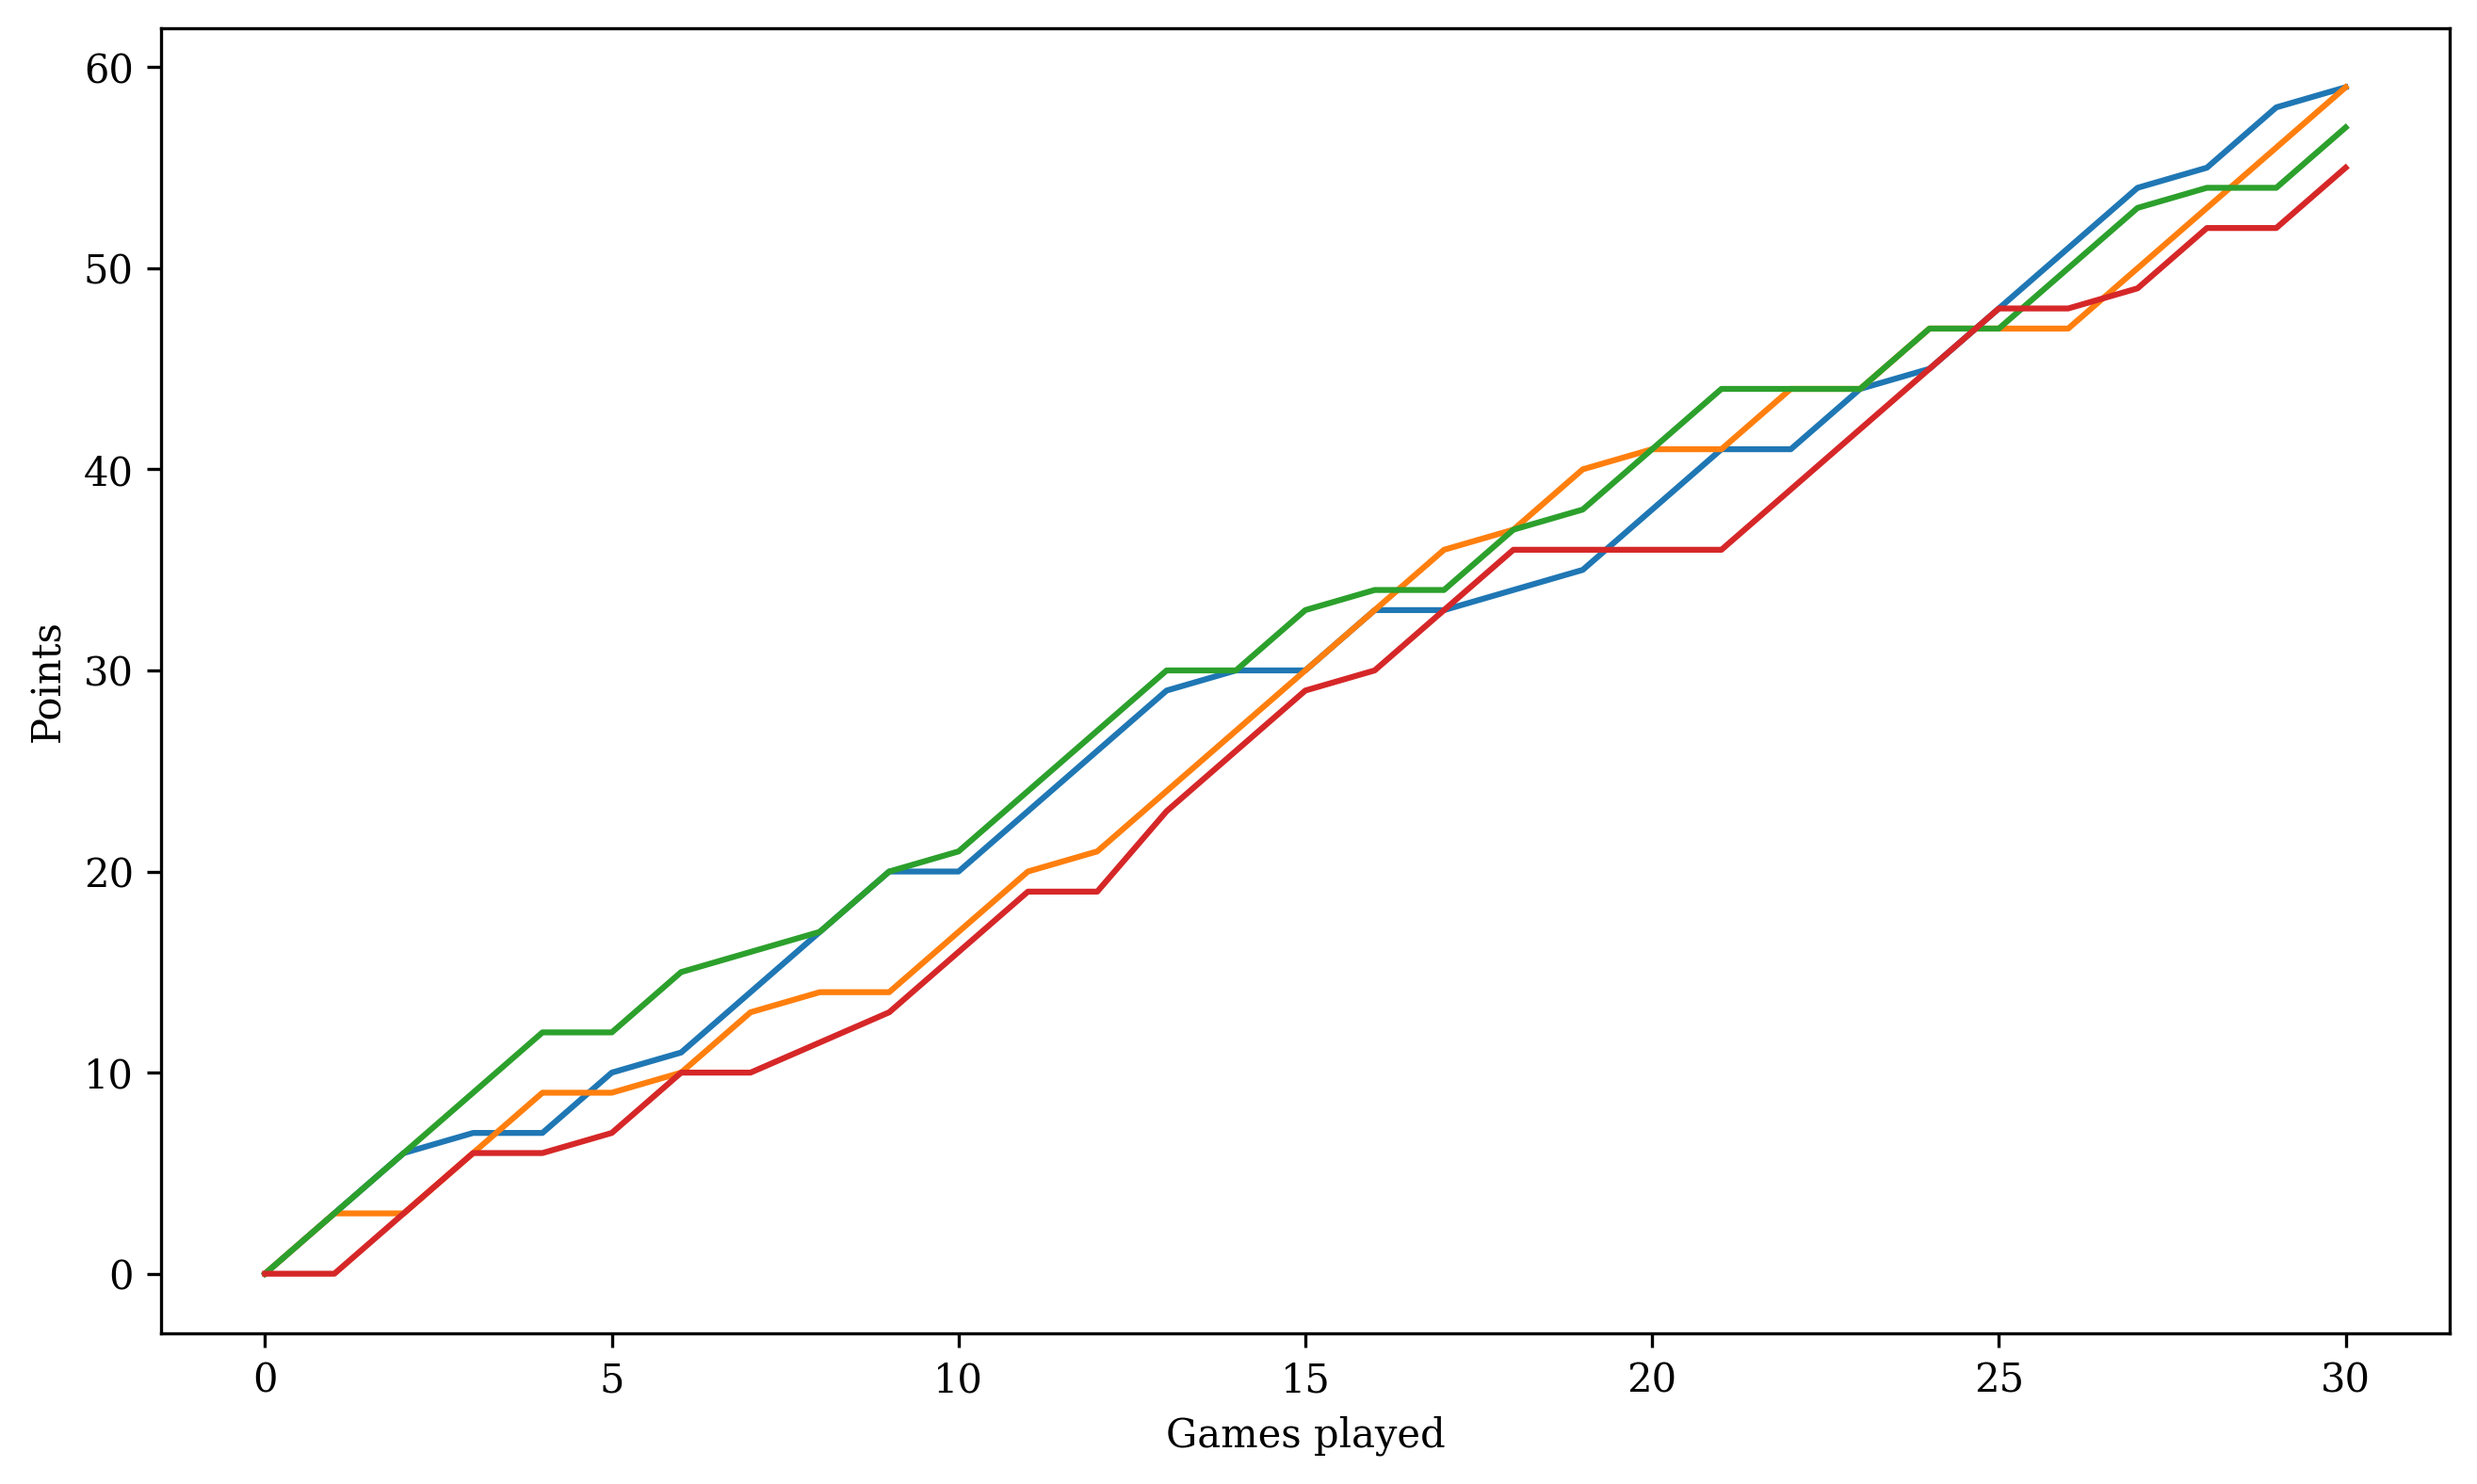

In [157]:
# Example dictionaries
dictionaries = [
{'Malmö FF': [(0,0),(1, 3),(2, 6), (3,7), (4,7), (5, 10), (6, 11), (7, 14), (9, 20), (10,20), (11,23), 
 (12, 26), (13, 29), (13, 29), (14, 30), (15, 30), (16, 33), (17, 33), (18, 34), (19, 35), (20, 38), (21, 41),
 (22, 41), (23, 44), (24, 45), (25, 48), (26, 51), (27, 54), (28, 55), (29, 58),(30, 59)]},

{'AIK': [(0,0),(1, 3), (2,3), (3,6), (4,9), (5, 9), (6, 10), (7, 13), (8, 14), (9, 14), (10,17), 
 (11,20), (12, 21), (13, 24), (14, 27), (15, 30), (16, 33), (17, 36), (18, 37), (19, 40), (20, 41), (21, 41), 
 (22,44), (23, 44), (24, 47), (25, 47), (26, 47), (27, 50), (28, 53), (29, 56), (30,59)]},

{'Djurgårdens IF': [(0,0),(1, 3), (2, 6), (3,9), (4,12), (5, 12), (6, 15), (7, 16), (8, 17), (9, 20), (10,21), 
 (11,24), (12, 27), (13, 30), (14, 30), (15, 33), (16, 34), (17, 34), (18, 37), (19, 38), (20, 41), (21, 44), 
 (22,44), (23, 44), (24, 47), (25, 47), (26, 50), (27, 53), (28, 54), (29, 54), (30,57)]},

{'IF Elfsborg': [(0,0),(1, 0),(2,3), (3,6), (4,6), (5, 7), (6, 10), (7, 10), (9, 13), (10, 16), (11,19), 
 (12,19), (13,23), (13, 23), (14, 26), (15, 29), (16, 30), (17, 33), (18, 36), (19, 36), (20, 36), (21, 36), 
 (22, 39), (23, 42), (24, 45), (25, 48), (26, 48), (27, 49), (28, 52), (29, 52), (30,55)]},

{'Hammarby IF': [(1, 0),(2,3),(3,3), (4, 4), (5, 7), (6, 10), (7, 11), (8, 11), (9, 12), (10,15), 
 (11,18), (12, 21), (13, 22), (14, 23), (15, 23), (16, 24), (17, 27), (18, 27), (19, 30), (20, 33), (21, 34),
 (22, 34), (23, 37), (24, 40), (25, 43), (26, 43), (27, 46), (28, 49), (29, 50), (30,53)]},

{'Kalmar FF': [(1,1),(2,4), (3,7), (4,8), (5, 9), (6, 10), (7, 10), (8, 13), (9, 14), (10,14), 
 (11,14), (12, 14), (13, 17), (14, 20), (15, 21), (16, 24), (17, 24), (18, 27), (19, 30), (20, 31), (21, 34), 
 (22, 37), (23, 37), (24, 37), (25, 38), (26, 41), (27, 44), (28, 47), (29, 47), (30,47)]},

{'IFK Norrköping FK': [(1,1),(2, 1), (3,4), (4,7), (5, 10), (6, 11), (7, 11), (8, 11), (9, 14), (10,17), 
 (11,17), (12,17), (13, 20), (14, 20), (15, 23), (16, 23), (17, 26), (18, 27), (19, 30), (20, 33), (21, 36), 
 (22, 39), (23, 39), (24, 39), (25, 40), (26, 43), (27, 43), (28, 44), (29, 44), (30,44)]},

{'IFK Göteborg': [(1,1),(2,4),(3,4), (4,5), (5, 6), (6, 7), (7, 8), (8, 9), (9,9), (10,12), 
 (11,15), (12, 15), (13, 15), (14, 16), (15, 19), (16, 19), (17, 19), (18, 22), (19, 22), (20, 22), (21, 22), 
 (22, 22), (23, 25), (24, 28), (25, 31), (26, 34), (27, 34), (28, 35), (29, 38), (30,41)]},

{'Mjällby AIF': [(1,1),(2, 1), (3,1), (4, 4), (5, 7), (6, 8), (7, 9), (8, 10), (9, 10), (10,10), 
 (11,10), (12, 12), (13, 10), (14, 11), (15, 11), (16, 12), (17, 15), (18, 15), (19, 17), (20, 18), (21, 21),
 (22, 24), (23, 27), (24, 27), (25, 28), (26, 31), (27, 31), (28, 34), (29, 35), (30,38)]},

{'Varbergs BoIS FC': [(1,1),(2, 1), (3,1), (4, 4), (5, 4), (6, 4), (7, 7), (8, 7), (9,8), (10,8), 
 (11,9), (12, 12), (13, 13), (14, 14), (15, 17), (16, 20), (17, 23), (18, 26), (19, 26), (20, 27), (21, 27), 
 (22, 28), (23, 28), (24, 29), (25, 30), (26, 33), (27, 34), (28, 34), (29, 37), (30,37)]},

{'IK Sirius FK': [(1, 1),(2,4),(3,7), (4,8), (5, 8), (6, 8), (7, 9), (8, 9), (9, 12), (10,12), 
 (11,12), (12, 15), (13, 15), (14, 16), (15, 16), (16, 17), (17, 20), (18, 23), (19, 26), (20, 26), (21, 27), 
 (22, 27), (23, 30), (24, 30), (25, 30), (26, 30), (27, 33), (28, 34), (29, 37), (30,37)]},

{'BK Häcken':  [(1, 0),(2, 0),(3,0), (4,1), (5, 2), (6, 2), (7, 3), (8, 6), (9,9), (10,12), 
 (11,15), (12, 16), (13, 16), (14, 19), (15, 19), (16, 19), (17, 22), (18, 22), (19, 23), (20, 24), (21,25), 
 (22, 28), (23, 31), (24, 31), (25, 32), (26, 32), (27, 35), (28, 36), (29, 36), (30,36)]},

{'Degerfors IF': [(1, 0),(2, 0),(3,3), (4,3), (5, 6), (6, 7), (7, 10), (8, 11), (9, 14), (10,14), 
 (11,14), (12, 14), (13, 15), (14,15), (15, 18), (16, 18), (16, 18), (17, 18), (18, 18), (19, 18), (20, 18), (21, 21),
 (22, 22), (23, 25), (24, 28), (25, 28), (26, 28), (27, 28), (28, 28), (29, 31), (30,34)]},

{'Halmstads BK': [(1, 3),(2,3),(3,3), (4, 4), (5, 4), (6, 5), (7, 8), (8, 9), (9, 10), (10,11), 
 (11,12), (12, 15), (13, 15), (14, 16), (15, 17), (16, 20), (17, 20), (18, 20), (19, 20), (20, 21), (21, 22), 
 (22, 23), (23, 23), (24, 26), (25, 27), (26, 30), (27, 30), (28, 30), (29, 31), (30,32)]},

{'Örebro SK': [(1,1),(2, 1), (3,0), (4,1), (5, 4), (7, 7), (8, 7), (9,7),(10,7), 
 (11,7), (12, 8), (13, 11), (14, 12), (15, 12), (16, 13), (17, 13), (18, 13), (19, 13), (20, 16), (21, 16), 
 (22, 16), (23, 16), (24, 16), (25, 17), (26, 17), (27, 17), (28, 17), (29, 18), (30,18)]},

{'Östersunds FK': [(1,1),(2,4), (3,5), (4,5), (5, 5), (6, 5), (7, 5), (8,8), (9,8), (10,8), 
 (11,8), (12, 8), (13, 9), (14, 9), (15, 9), (16, 9), (17, 9), (18, 9), (19, 12), (20, 12), (21, 12), 
 (22, 13), (23, 13), (24, 13), (25, 14), (26, 14), (27, 14), (28, 14), (29, 14), (30,14)]}]

# Extract the data for plotting
x_values = []
y_values = []
labels = []

for dictionary in dictionaries[0:4]:
    team_name = list(dictionary.keys())[0]
    data = list(dictionary.values())[0]
    x, y = zip(*data)
    x_values.append(x)
    y_values.append(y)
    labels.append(team_name)
    
#colors = ["#a7d7ff", 'black', '#002554', '#F7DC14']

# Plotting the data
plt.figure(figsize=(12,6), dpi=300)
for x, y, label in zip(x_values, y_values, labels):
    plt.plot(x, y, label=label)

# Set the x-axis and y-axis labels
plt.xlabel('Games played')
plt.ylabel('Points')

# Set the title
#plt.title('Points Progression')

# Move the legend outside the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.8)

# Display the plot
plt.savefig(fname='PointsProgression2021', dpi=1000, transparent=True)
plt.show()


In [91]:
malmö_home_xg = 0
malmö_away_xg = 0

aik_home_xg = 0
aik_away_xg = 0

elfsborg_home_xg = 0
elfsborg_away_xg = 0

# Loop over the dataframe
for row in allsvenskan.itertuples(index=False):
    home_team = row.homeTeam
    visiting_team = row.visitingTeam
    xg_values = row.xG
    
    # Extract xG values using regex
    xg_values = re.findall(r'\d+\.\d+', xg_values)
    
    # Convert xG values from string to float
    xg_values = [float(xg) for xg in xg_values]
    
    # Check if Malmö is the home team
    if home_team == 'Malmö FF':
        malmö_home_xg += xg_values[0]
    
    # Check if Malmö is the visiting team
    if visiting_team == 'Malmö FF':
        malmö_away_xg += xg_values[1]
        
    # Check if AIK is the home team
    if home_team == 'AIK':
        aik_home_xg += xg_values[0]
    
    # Check if AIK is the visiting team
    if visiting_team == 'AIK':
        aik_away_xg += xg_values[1]
        
    # Check if Elfsborg is the home team
    if home_team == 'Elfsborg':
        elfsborg_home_xg += xg_values[0]
    
    # Check if Elfsborg is the visiting team
    if visiting_team == 'Elfsborg':
        elfsborg_away_xg += xg_values[1]

In [104]:
djurgården_home_xg_conceded = 0
djurgården_away_xg_conceded = 0

malmö_home_xg_conceded = 0
malmö_away_xg_conceded = 0

aik_home_xg_conceded = 0
aik_away_xg_conceded = 0

elfsborg_home_xg_conceded = 0
elfsborg_away_xg_conceded = 0

# Loop over the dataframe
for row in allsvenskan.itertuples(index=False):
    home_team = row.homeTeam
    visiting_team = row.visitingTeam
    xg_values = row.xG
    
    # Extract xG values using regex
    xg_values = re.findall(r'\d+\.\d+', xg_values)
    
    # Convert xG values from string to float
    xg_values = [float(xg) for xg in xg_values]
    
    # Check if Malmö is the home team
    if home_team == 'Djurgården':
        djurgården_home_xg_conceded += xg_values[1]
    
    # Check if Malmö is the visiting team
    if visiting_team == 'Djurgården':
        djurgården_away_xg_conceded += xg_values[0]
    
    # Check if Malmö is the home team
    if home_team == 'Malmö FF':
        malmö_home_xg_conceded += xg_values[1]
    
    # Check if Malmö is the visiting team
    if visiting_team == 'Malmö FF':
        malmö_away_xg_conceded += xg_values[0]
        
    # Check if AIK is the home team
    if home_team == 'AIK':
        aik_home_xg_conceded += xg_values[1]
    
    # Check if AIK is the visiting team
    if visiting_team == 'AIK':
        aik_away_xg_conceded += xg_values[0]
        
    # Check if Elfsborg is the home team
    if home_team == 'Elfsborg':
        elfsborg_home_xg_conceded += xg_values[1]
    
    # Check if Elfsborg is the visiting team
    if visiting_team == 'Elfsborg':
        elfsborg_away_xg_conceded += xg_values[0]

In [96]:
print(f"Djurgården home XG: {djurgården_home_xg},\n"
      f"Djurgården away XG: {djurgården_away_xg}\n"
      f"Malmö home XG: {malmö_home_xg}\n"
      f"Malmö away XG: {malmö_away_xg}\n"
      f"AIK home XG: {aik_home_xg}\n"
      f"AIK away XG: {aik_away_xg}\n"
      f"Elfsborg home XG: {elfsborg_home_xg}\n"
      f"Elfsborg away XG: {elfsborg_away_xg}\n")


Djurgården home XG: 39.45131044418999,
Djurgården away XG: 17.43975590135545
Malmö home XG: 38.721803097372764
Malmö away XG: 30.516621097833987
AIK home XG: 26.515918040307294
AIK away XG: 18.5084550678941
Elfsborg home XG: 29.64268219771389
Elfsborg away XG: 27.234004437938044



In [105]:
print(f"Djurgården home XG: {djurgården_home_xg_conceded},\n"
      f"Djurgården away XG: {djurgården_away_xg_conceded}\n"
      f"Malmö home XG: {malmö_home_xg_conceded}\n"
      f"Malmö away XG: {malmö_away_xg_conceded}\n"
      f"AIK home XG: {aik_home_xg_conceded}\n"
      f"AIK away XG: {aik_away_xg_conceded}\n"
      f"Elfsborg home XG: {elfsborg_home_xg_conceded}\n"
      f"Elfsborg away XG: {elfsborg_away_xg_conceded}\n")


Djurgården home XG: 15.311978842174952,
Djurgården away XG: 15.724652867097738
Malmö home XG: 14.435248679288092
Malmö away XG: 13.497664012220097
AIK home XG: 11.564485530809463
AIK away XG: 20.01130765954119
Elfsborg home XG: 12.30791935381831
Elfsborg away XG: 22.83678595310228



In [97]:
djurgårdenXG=djurgården_home_xg+djurgården_away_xg
malmöXG = malmö_home_xg+malmö_away_xg
aikXG=aik_away_xg+aik_home_xg
elfsborgXG=elfsborg_away_xg+elfsborg_home_xg

In [106]:
djurgårdenXG_conceded =djurgården_home_xg_conceded+djurgården_away_xg_conceded
malmöXG_conceded = malmö_home_xg_conceded+malmö_away_xg_conceded
aikXG_conceded =aik_away_xg_conceded+aik_home_xg_conceded
elfsborgXG_conceded =elfsborg_away_xg_conceded+elfsborg_home_xg_conceded

In [109]:
print(f"Djurgården XG: {djurgårdenXG},\n"
      f"Malmö XG: {malmöXG}\n"
      f"AIK XG: {aikXG}\n"
      f"Elfsborg XG: {elfsborgXG}\n")

Djurgården XG: 56.89106634554544,
Malmö XG: 69.23842419520675
AIK XG: 45.024373108201395
Elfsborg XG: 56.876686635651936



In [108]:
print(f"Djurgården home XG_conceded: {djurgårdenXG_conceded},\n"
      f"Malmö home XG_conceded: {malmöXG_conceded}\n"
      f"AIK home XG_conceded: {aikXG_conceded}\n"
      f"Elfsborg home XG_conceded: {elfsborgXG_conceded}\n")

Djurgården home XG_conceded: 31.03663170927269,
Malmö home XG_conceded: 27.93291269150819
AIK home XG_conceded: 31.57579319035065
Elfsborg home XG_conceded: 35.144705306920585



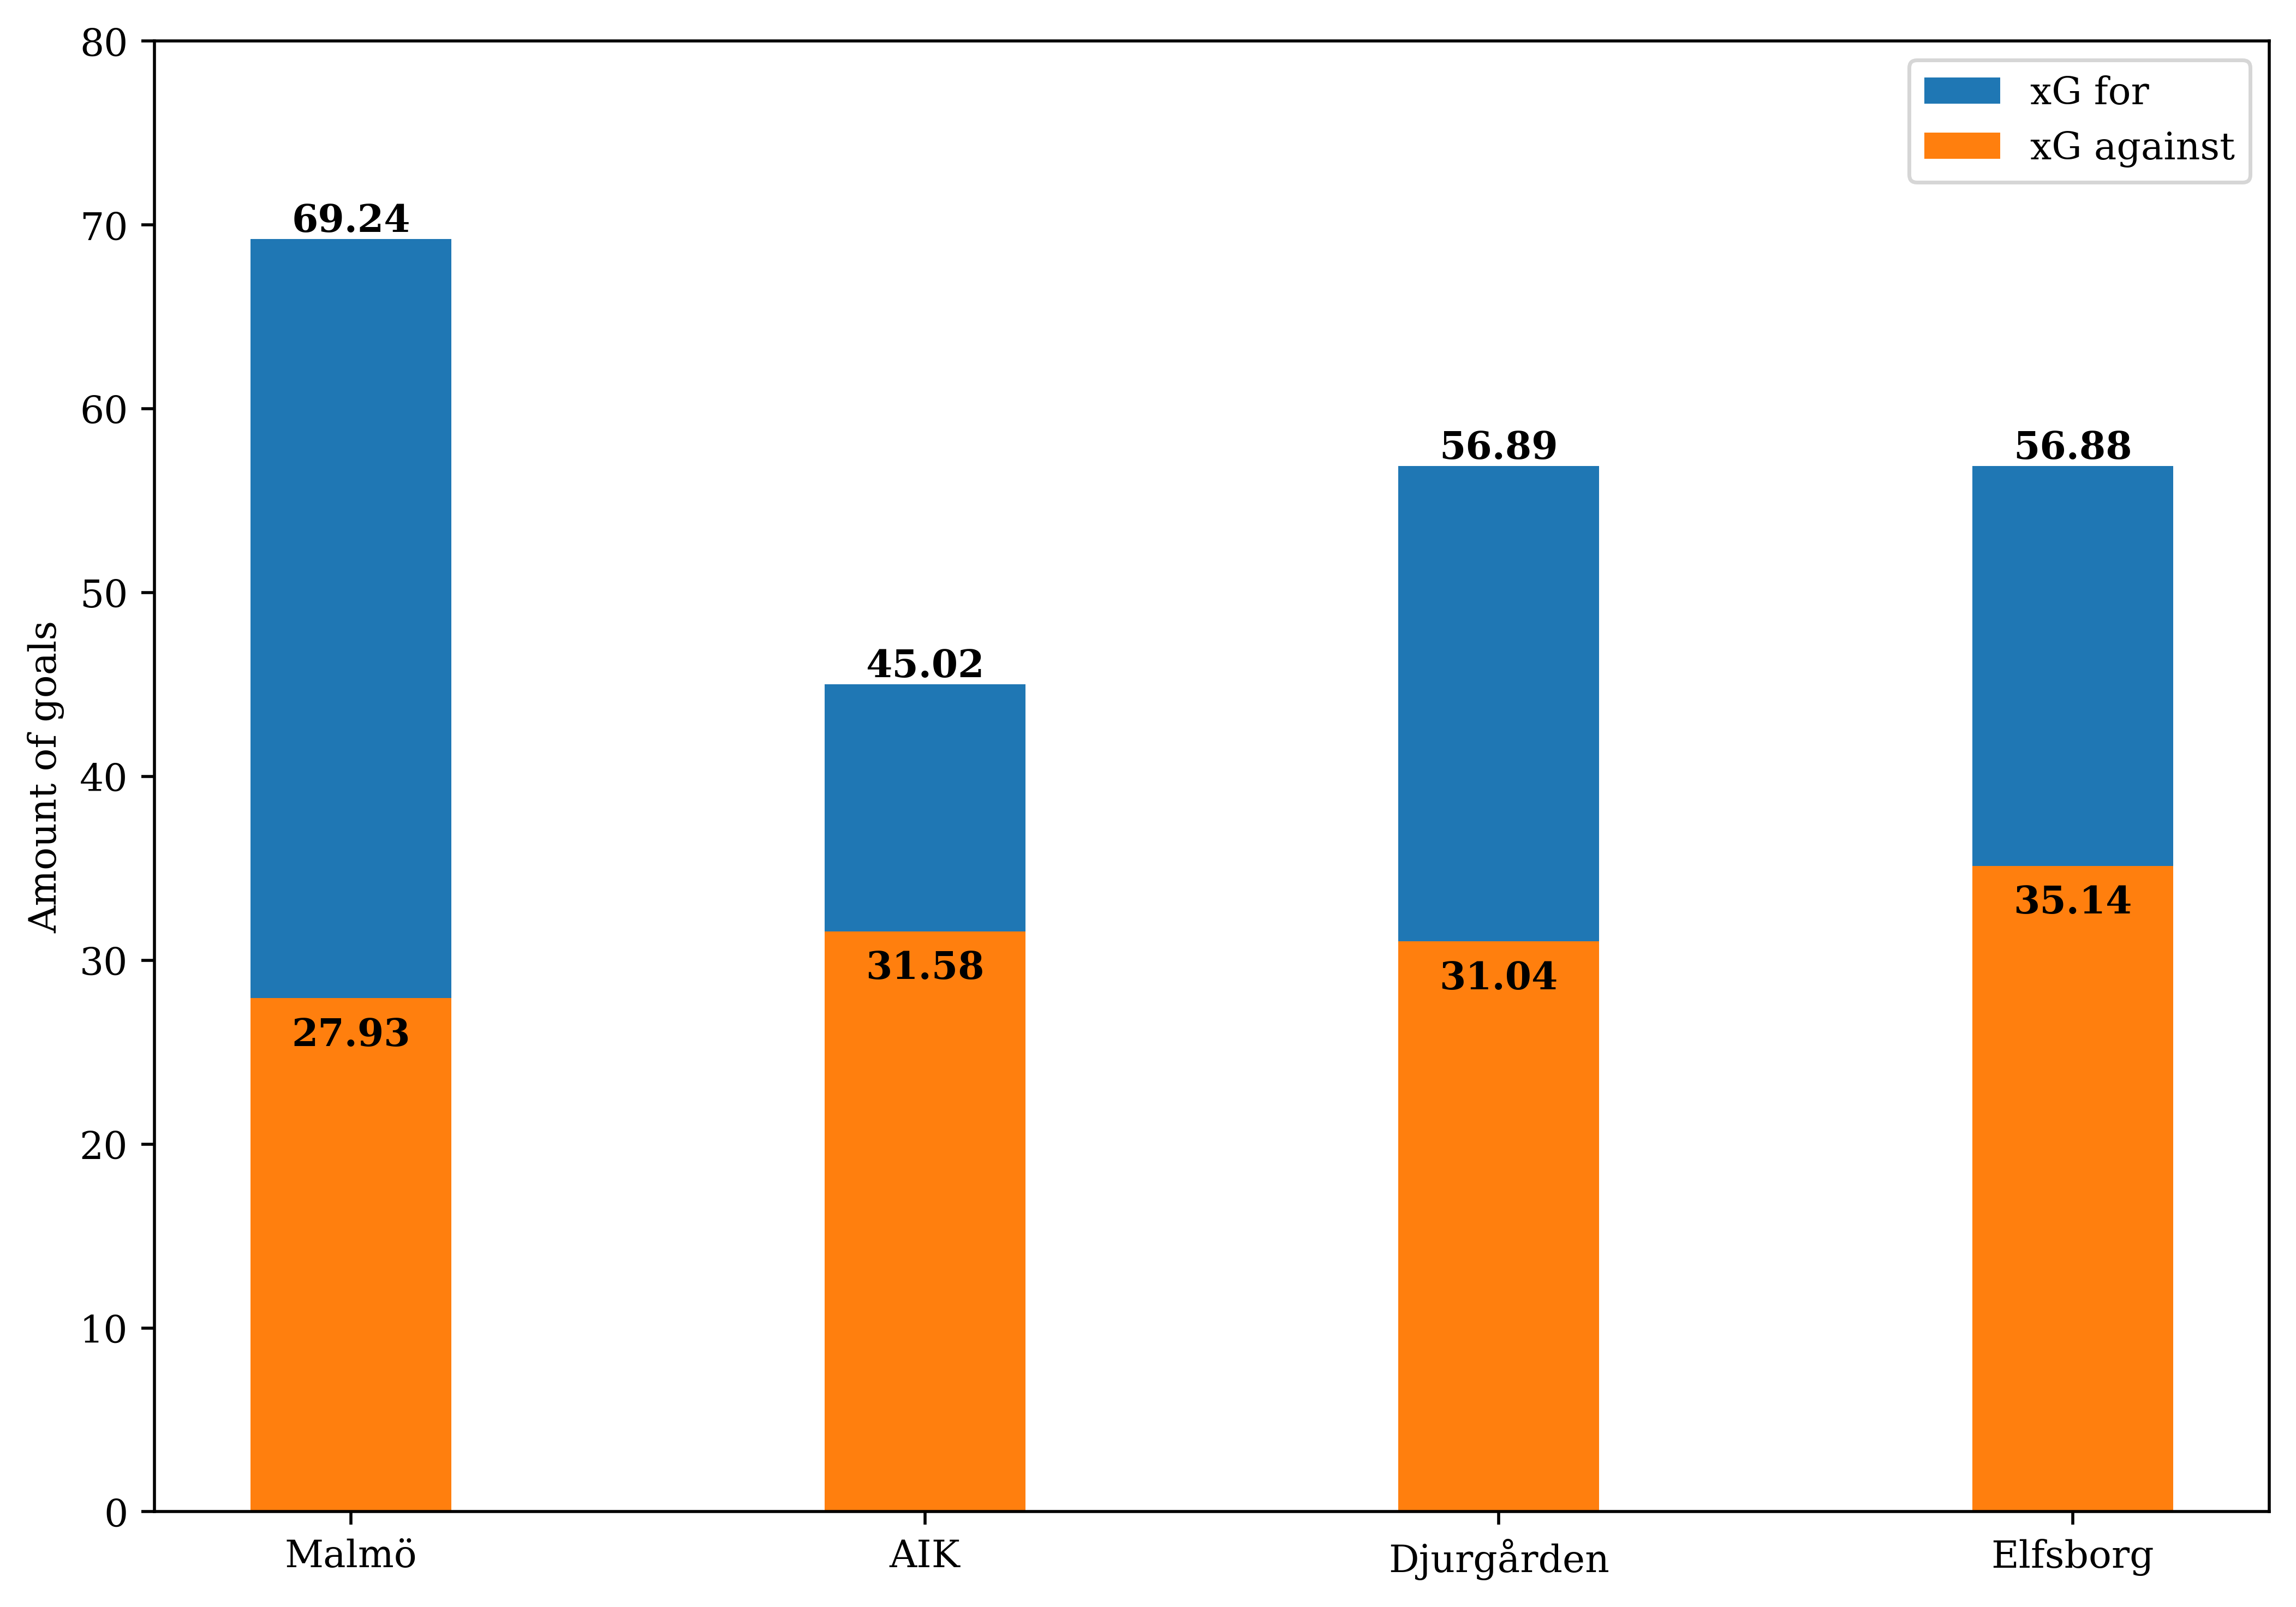

In [145]:
N = 4
xg_for = (69.24, 45.02, 56.89, 56.88)
xg_against = (27.93, 31.58, 31.04, 35.14)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), dpi=500)

p1 = ax.bar(ind, xg_for, width, label='xG for')
p2 = ax.bar(ind, xg_against, width, label='xG against')

ax.set_ylabel('Amount of goals')
#ax.set_title('xGoals per team, full season', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(('Malmö', 'AIK', 'Djurgården', 'Elfsborg'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend()

# Annotate each bar with its value
for i, v in enumerate(xg_for):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(xg_against):
    ax.text(i, v-3, str(v), ha='center', va='bottom', fontweight='bold')

plt.savefig('xGoals_per_team', transparent=True, dpi=1000)
plt.show()

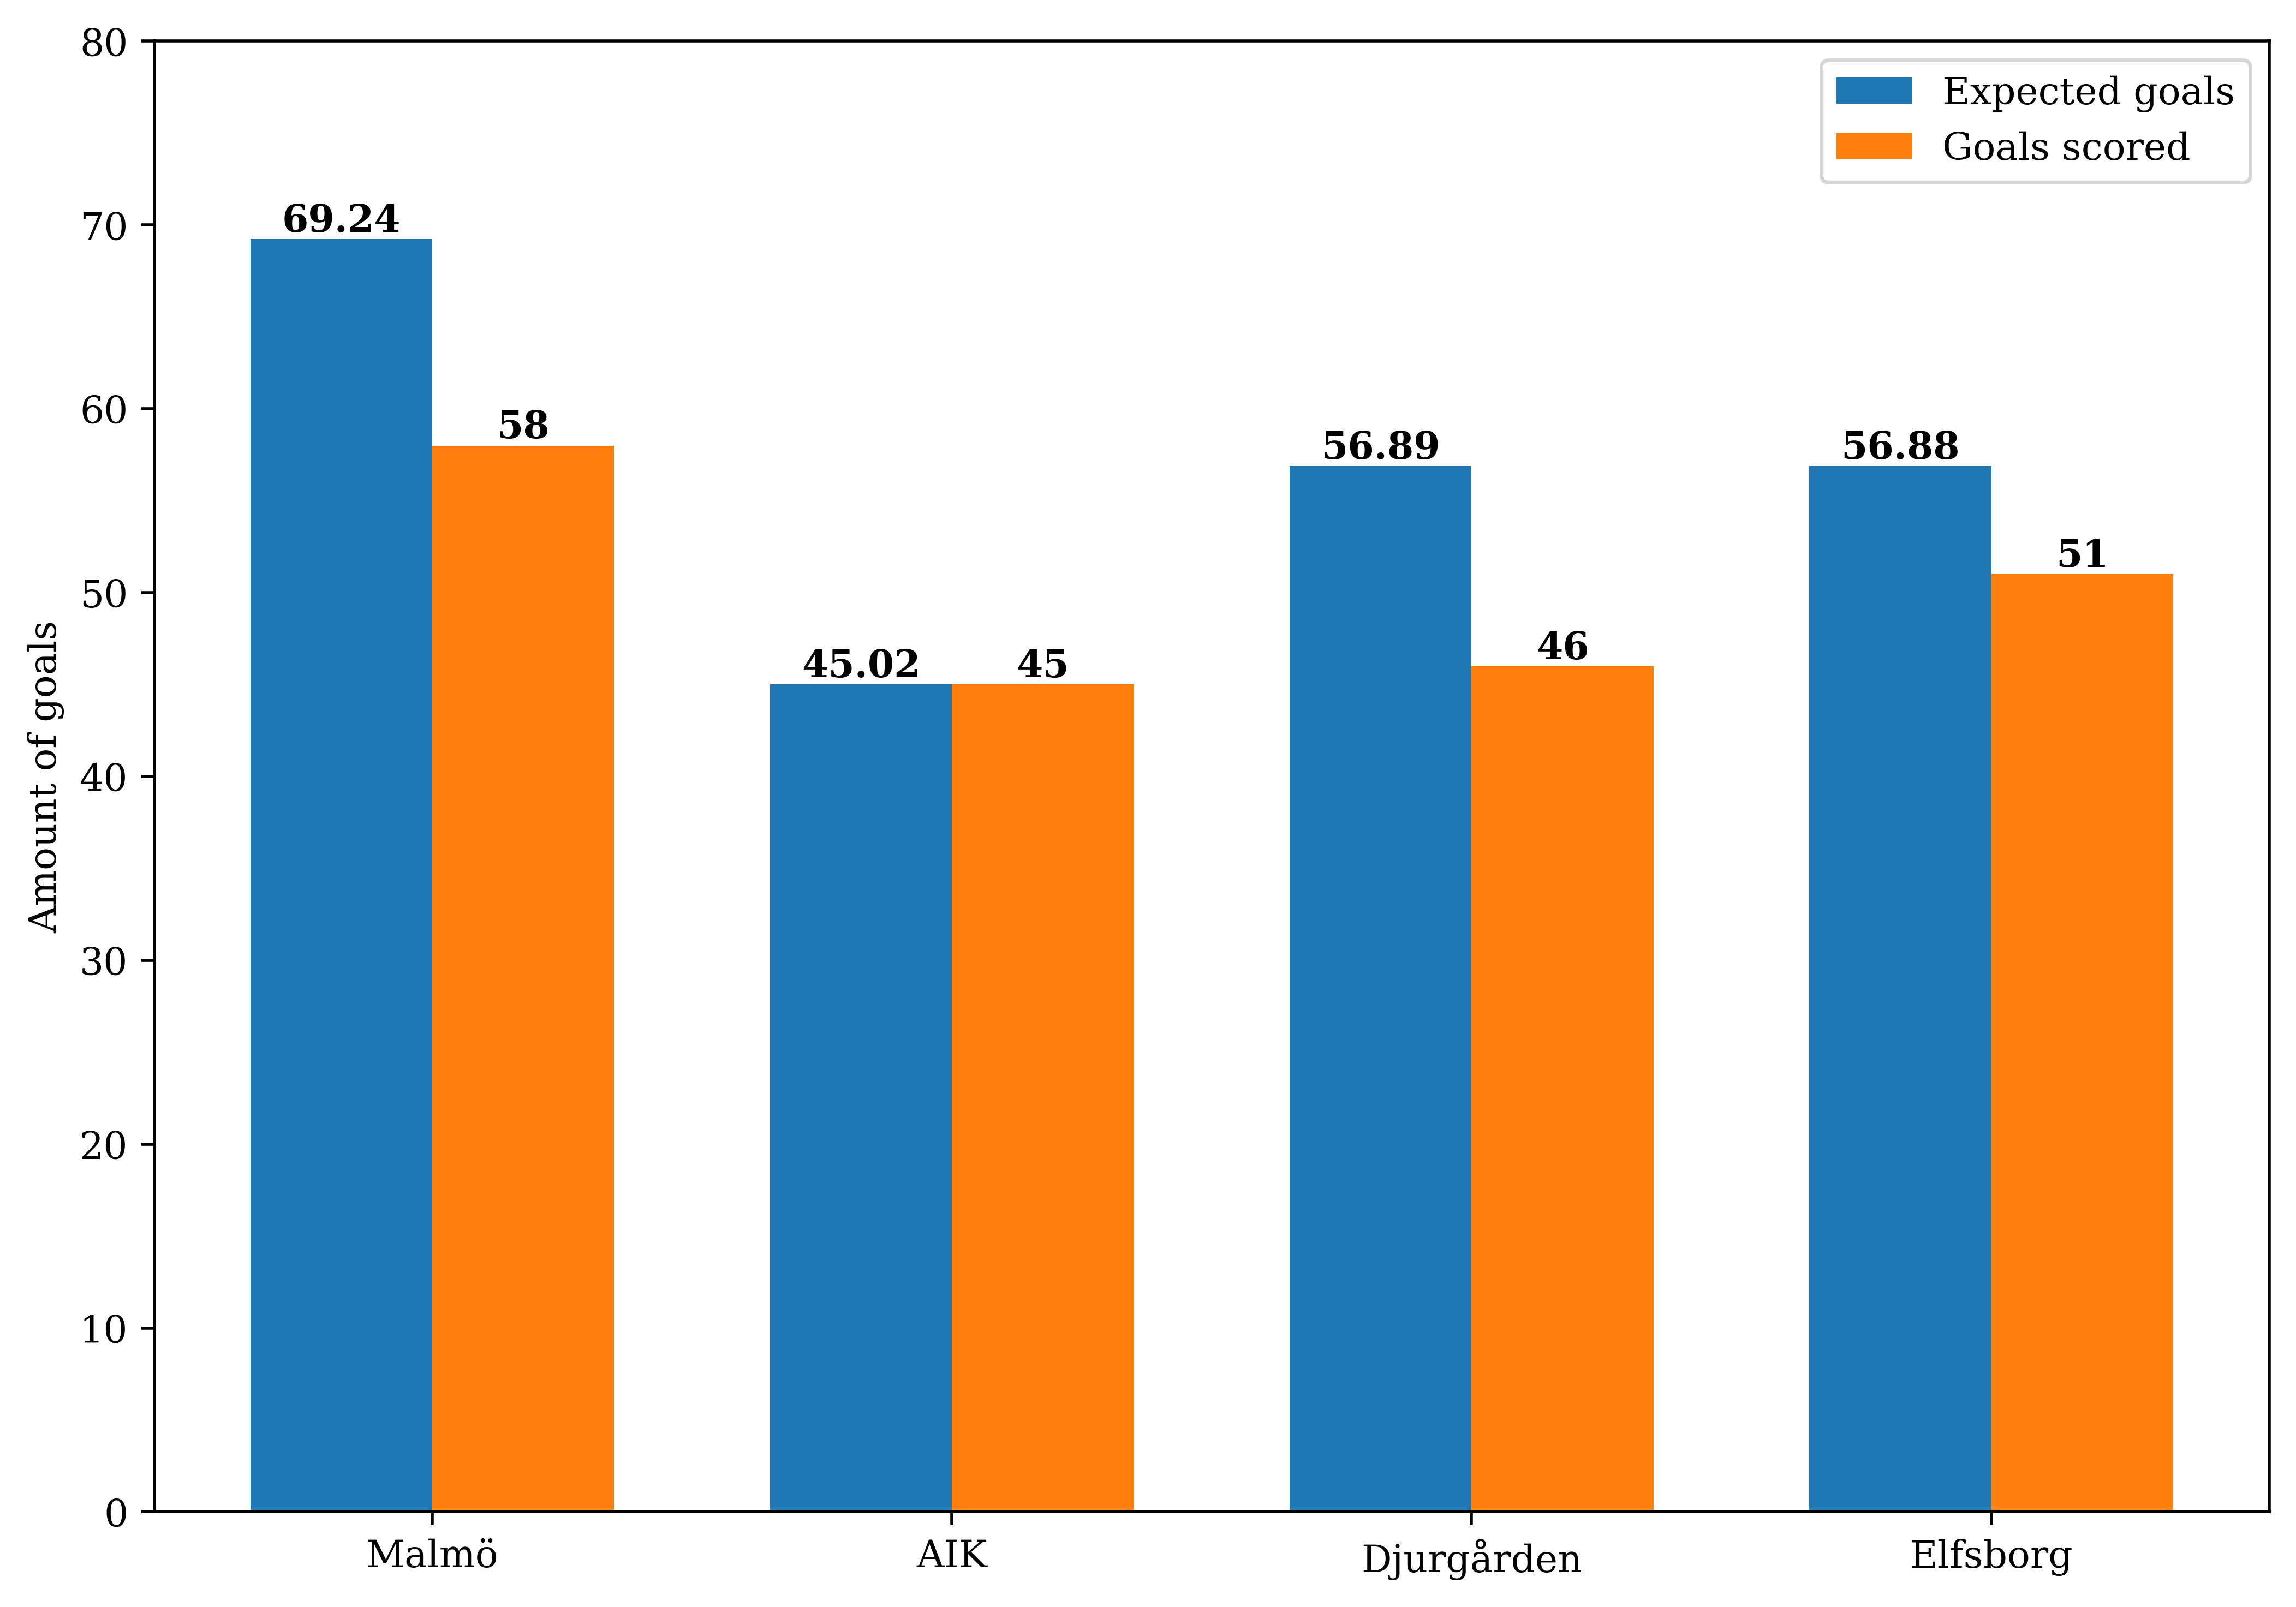

In [144]:
N = 4
xg_for = (69.24, 45.02, 56.89, 56.88)
goals_scored = (58, 45, 46, 51)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), dpi=500)

p1 = ax.bar(ind, xg_for, width, label='Expected goals')
p2 = ax.bar(ind + width, goals_scored, width, label='Goals scored')  # Adjust the x-coordinates

ax.set_ylabel('Amount of goals')
#ax.set_title('Expected vs Actual Goals', fontsize=20)
ax.set_xticks(ind + width / 2)  # Adjust the x-tick positions
ax.set_xticklabels(('Malmö', 'AIK', 'Djurgården', 'Elfsborg'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend()

# Annotate each bar with its value
for i, v in enumerate(xg_for):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(goals_scored):
    ax.text(i + width, v, str(v), ha='center', va='bottom', fontweight='bold')  # Adjust the x-coordinate

plt.savefig('xGoals_vs_actualGoals', transparent=True, dpi=1000)
plt.show()

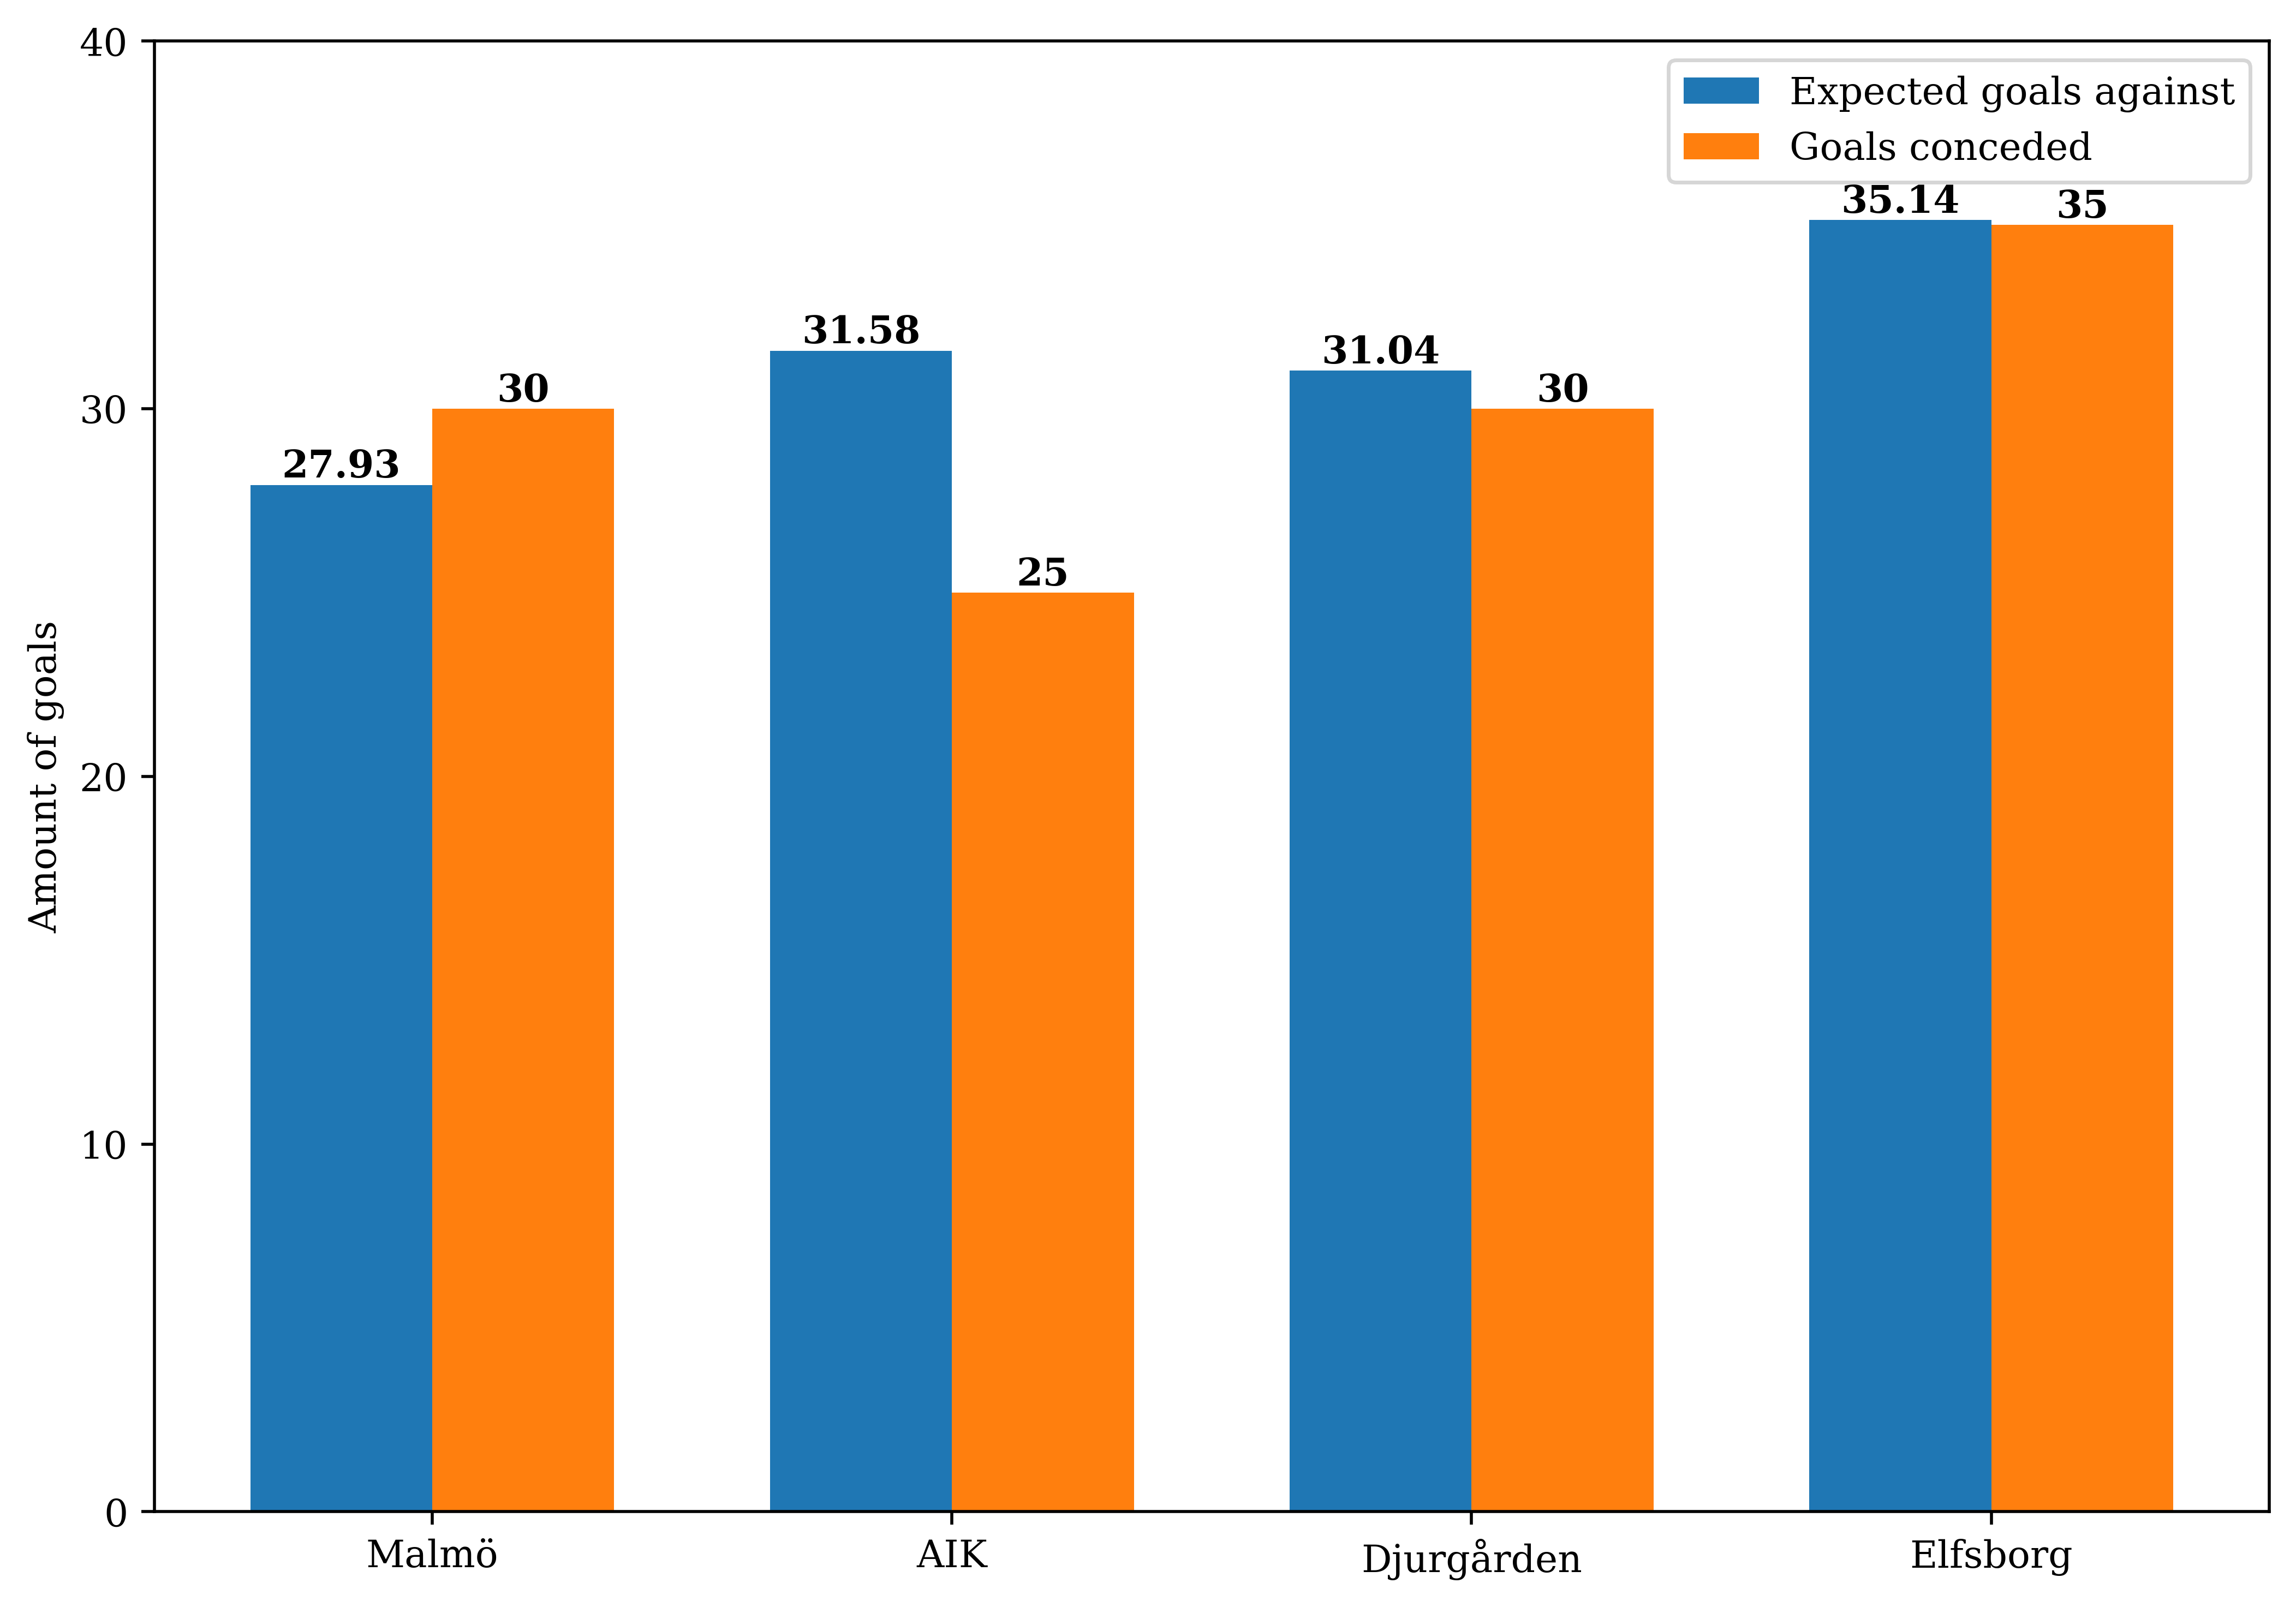

In [148]:

N = 4
xg_against = (27.93, 31.58, 31.04, 35.14)
goals_conceded = (30, 25, 30, 35)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), dpi=500)

p1 = ax.bar(ind, xg_against, width, label='Expected goals against')
p2 = ax.bar(ind + width, goals_conceded, width, label='Goals conceded')  # Adjust the x-coordinates

ax.set_ylabel('Amount of goals')
#ax.set_title('Expected vs Actual Goals', fontsize=20)
ax.set_xticks(ind + width / 2)  # Adjust the x-tick positions
ax.set_xticklabels(('Malmö', 'AIK', 'Djurgården', 'Elfsborg'))
ax.set_yticks(np.arange(0, 50, 10))
ax.legend()

# Annotate each bar with its value
for i, v in enumerate(xg_against):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(goals_conceded):
    ax.text(i + width, v, str(v), ha='center', va='bottom', fontweight='bold')  # Adjust the x-coordinate

plt.savefig('xGoalsAgainst_vs_actualGoalsAgainst', transparent=True, dpi=1000)
plt.show()

In [159]:
print(malmöXG-malmöXG_conceded)
print(aikXG-aikXG_conceded)
print(djurgårdenXG-djurgårdenXG_conceded)
print(elfsborgXG-elfsborgXG_conceded)


41.305511503698554
13.448579917850743
25.85443463627275
21.73198132873135


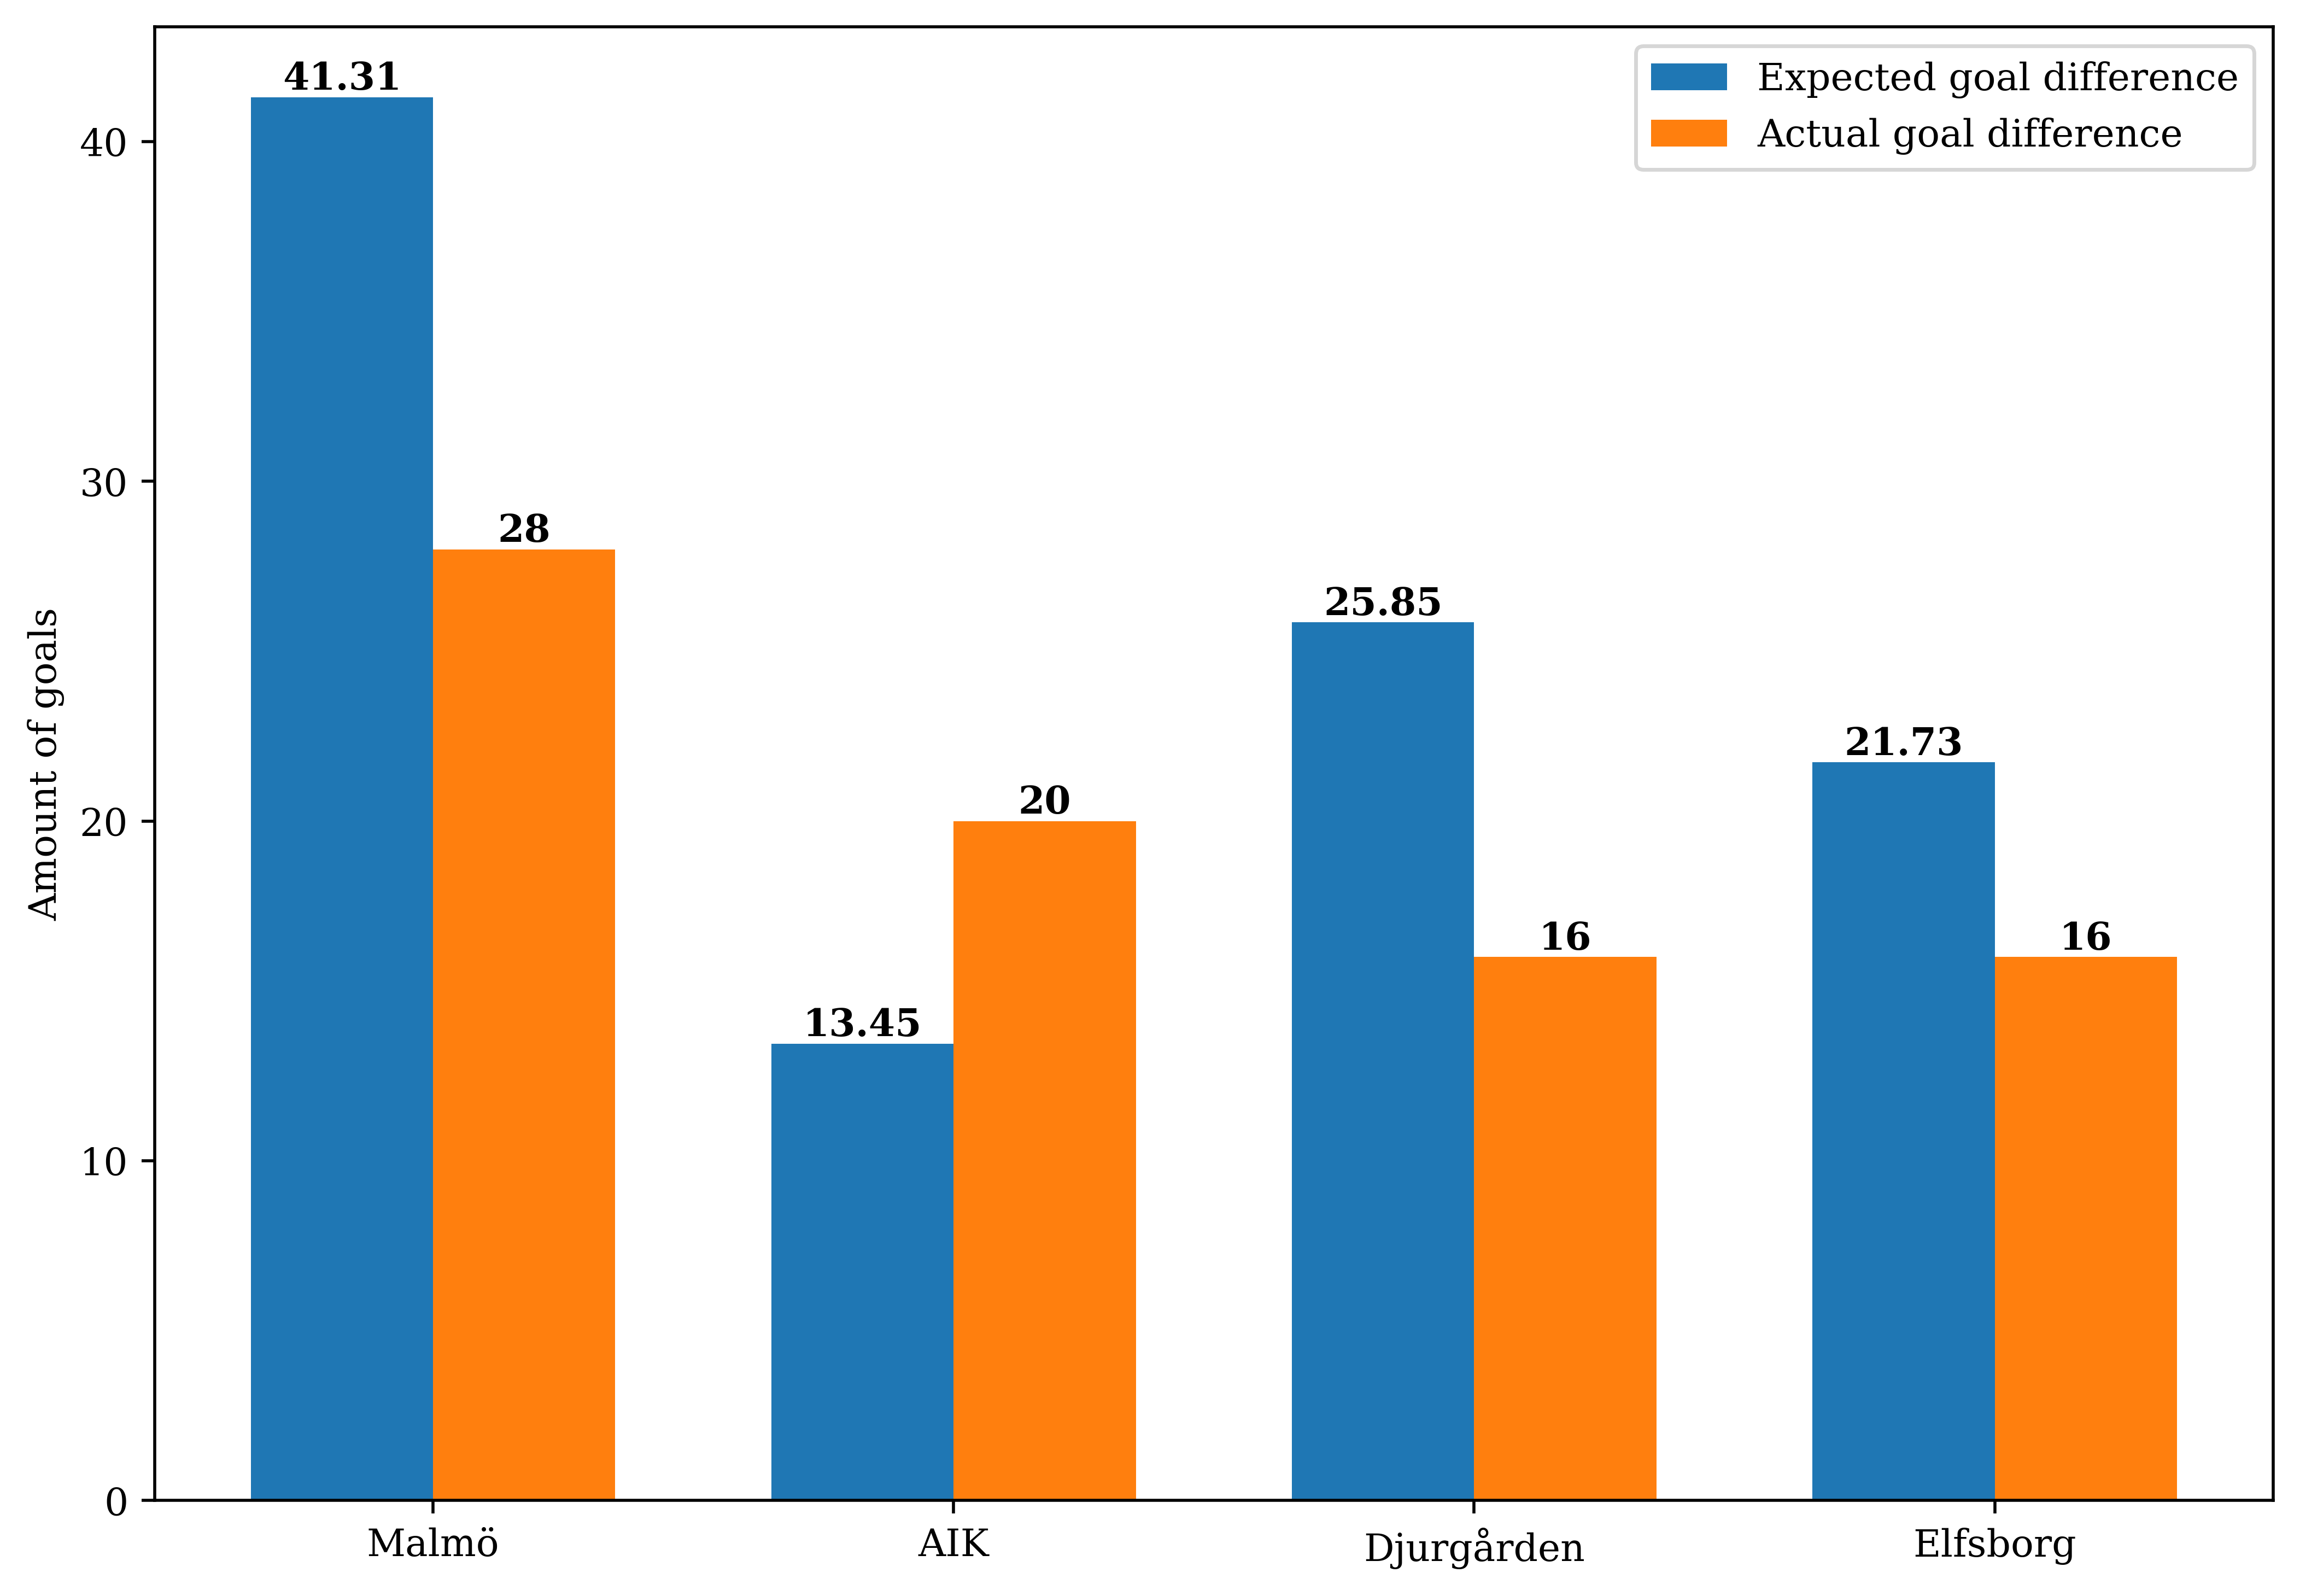

In [161]:

N = 4
xg_diff = (41.31, 13.45, 25.85, 21.73)
goals_diff = (28, 20, 16, 16)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7), dpi=500)

p1 = ax.bar(ind, xg_diff, width, label='Expected goal difference')
p2 = ax.bar(ind + width, goals_diff, width, label='Actual goal difference')  # Adjust the x-coordinates

ax.set_ylabel('Amount of goals')
#ax.set_title('Expected vs Actual Goals', fontsize=20)
ax.set_xticks(ind + width / 2)  # Adjust the x-tick positions
ax.set_xticklabels(('Malmö', 'AIK', 'Djurgården', 'Elfsborg'))
ax.set_yticks(np.arange(0, 50, 10))
ax.legend()

# Annotate each bar with its value
for i, v in enumerate(xg_diff):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(goals_diff):
    ax.text(i + width, v, str(v), ha='center', va='bottom', fontweight='bold')  # Adjust the x-coordinate

plt.savefig('xGDiff_vs_GoalDiff', transparent=True, dpi=1000)
plt.show()

In [221]:
pd.Series.sum(aik_djurgården_events.loc[aik_djurgården_events.team == 'Djurgården'].groupby(aik_djurgården_events.player).xt.sum())

3.027945608974777

In [199]:
pd.Series.sum(aik_djurgården_events.loc[aik_djurgården_events.team == 'AIK'].groupby(aik_djurgården_events.player).xt.sum().sort_values())

2.8799380452921817

In [227]:
for i in allsvenskan
xT_djurgården_lst=[]
xT_not_djurgården_lst=[]

tmp = pd.DataFrame(djurgården.events[i])

dj_subset =  tmp[tmp['team']=='Djurgården']
xT_djurgården = pd.Series.sum(dj_subset.groupby(tmp.player).xt.sum())
xT_djurgården_lst.append(xT_djurgården)    
    
not_dj_subset =  tmp[tmp['team']!='Djurgården']
xT_not_djurgården = pd.Series.sum(not_dj_subset.groupby(tmp.player).xt.sum())
xT_not_djurgården_lst.append(xT_not_djurgården) 

In [228]:
print(xT_djurgården_lst)
print(xT_not_djurgården_lst)

[0.9569305496787749]
[3.6948218967501094]


In [234]:
pd.Series.sum(elfsborg_djurgården_events.loc[elfsborg_djurgården_events.team == 'Djurgården'].groupby(elfsborg_djurgården_events.player).xt.sum())

0.9569305496787749

In [236]:
elfsborg_djurgården_events.loc[elfsborg_djurgården_events.team == 'Elfsborg'].groupby(elfsborg_djurgården_events.player).xt.sum()

player
A. Rømer      0.435130
C. Mcvey      0.070697
F. Holst      0.086078
J. Larsson    1.412220
J. Okkels     0.032201
J. Okumu      0.094000
M. Jarjué     0.080847
M. Ndione     0.075925
P. Frick     -0.002381
R. Alm        0.693574
R. Gojani     0.100816
S. Holmén    -0.003844
S. Strand     0.585536
T. Rönning    0.034023
Name: xt, dtype: float64

In [251]:
djurgården.loc[djurgården.homeTeam == 'AIK']

,season,homeTeam,visitingTeam,score,xG,events,eid,date,season_id,id
21,"Allsvenskan, 2021",AIK,Djurgården,"[1, 0]","[1.275167250604716, 0.7845074264077959]","[{'xdest': 34, 'xpos': 49, 'header': False, 'n...",None,2021-10-03 13:00:00,634aa35d17d5d46fdfb42e35,634aa4b817d5d46fdfb4310d


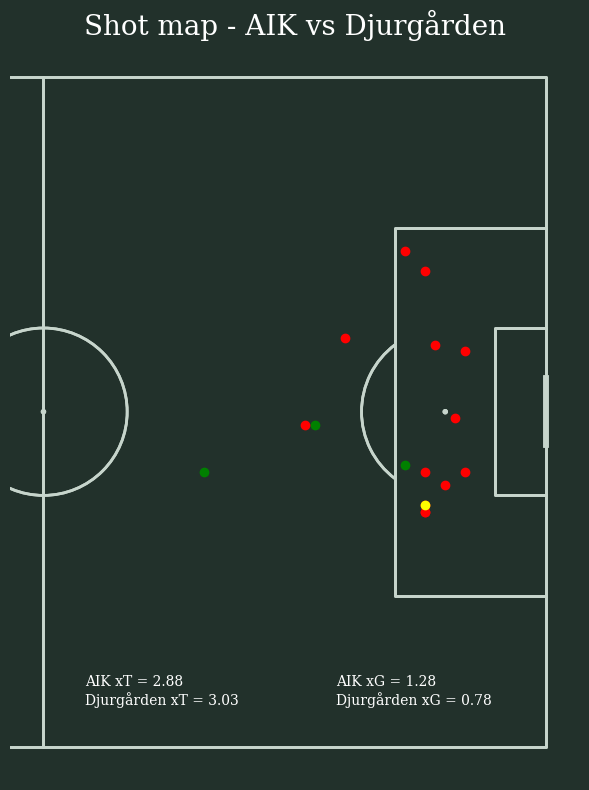

In [246]:
fig, ax = pitch.draw(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb',
    half=True,
    pitch_color='#22312b',
    line_color="#c7d5cc")
pitch.draw(ax=ax)

plt.gca().invert_yaxis

        
for x in range(len(aik_djurgården_events.loc[aik_djurgården_events['team']=='Djurgården'])):
    if aik_djurgården_events.action[x] == 'Shot' and aik_djurgården_events.team[x] == 'Djurgården':
        plt.plot((aik_djurgården_events['xpos'][x], aik_djurgården_events['xdest'][x]),
                 (aik_djurgården_events['ypos'][x], aik_djurgården_events['ydest'][x]), color="green")
        plt.scatter(aik_djurgården_events['xpos'][x],(aik_djurgården_events['ypos'][x]), color='green')
        
for x in range(len(aik_djurgården_events.loc[aik_djurgården_events['team']=='Djurgården'])):
    if aik_djurgården_events.action[x] == 'Shot' and aik_djurgården_events.team[x] == 'AIK':
        plt.plot((aik_djurgården_events['xpos'][x], aik_djurgården_events['xdest'][x]),
                 (aik_djurgården_events['ypos'][x], aik_djurgården_events['ydest'][x]), color="red")
        plt.scatter(aik_djurgården_events['xpos'][x],(aik_djurgården_events['ypos'][x]), color='red')
        
for x in range(len(aik_djurgården_events.loc[aik_djurgården_events['team']=='Djurgården'])):
    if aik_djurgården_events.action[x] == 'Assist':
        plt.plot((aik_djurgården_events['xpos'][x], aik_djurgården_events['xdest'][x]),
                 (aik_djurgården_events['ypos'][x], aik_djurgården_events['ydest'][x]), color="blue")
        plt.scatter(aik_djurgården_events['xpos'][x],(aik_djurgården_events['ypos'][x]), color='blue')
        
for x in range(len(aik_djurgården_events.loc[aik_djurgården_events['team']=='Djurgården'])):
    if aik_djurgården_events.action[x] == 'Goal':
        plt.scatter(aik_djurgården_events['xpos'][x],(aik_djurgården_events['ypos'][x]), color='yellow')

        
plt.title("Shot map - AIK vs Djurgården", color='white', fontsize=20)
plt.text(65, 75, 'AIK xT = 2.88 \nDjurgården xT = 3.03', color='white')
plt.text(95, 75, 'AIK xG = 1.28 \nDjurgården xG = 0.78', color='white')

plt.savefig('Shotmap-AIK_Djurgården', dpi=300)

plt.show()


# The red dots are showing where the passes were made!

In [252]:
aik_djurgården_events

,external_id,action,team,player,xpos,ypos,next_player,xdest,ydest,xt,game_time,start_time,end_time,xg,xp,attack_type,penalty,header,throw_in,goal_mouth
0,1,Pass accurate,Djurgården,K. Holmberg,58.8,40.8,E. Käck,40.8,46.4,-0.002245,0,1,4,NaN,0.882111,NaN,False,False,False,NaN
1,2,Pass accurate,Djurgården,E. Käck,40.8,46.4,E. Otieno,78.0,6.4,0.006319,0,4,7,NaN,0.645717,NaN,False,False,False,NaN
2,3,Challenge successful,AIK,E. Otieno,42.0,73.6,J. Asoro,NaN,NaN,NaN,0,7,7,NaN,NaN,NaN,False,False,False,NaN
3,4,Air challenge successful,AIK,E. Otieno,42.0,73.6,J. Asoro,NaN,NaN,NaN,0,7,7,NaN,NaN,NaN,False,False,False,NaN
4,5,Challenge unsuccessful,Djurgården,J. Asoro,78.0,6.4,S. Papagiannopoulos,NaN,NaN,NaN,0,7,9,NaN,NaN,NaN,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,2453,Goal kicks (Successful actions),AIK,K. Nordfeldt,0.0,34.4,B. Radulovic,NaN,NaN,NaN,94,5694,5697,NaN,NaN,NaN,False,False,False,NaN
2437,2454,Interception,AIK,B. Radulovic,87.6,28.0,J. Une Larsson,NaN,NaN,NaN,94,5697,5697,NaN,NaN,NaN,False,False,False,NaN
2438,2455,Interception,Djurgården,J. Une Larsson,32.4,52.0,B. Radulovic,NaN,NaN,NaN,94,5697,5699,NaN,NaN,NaN,False,False,False,NaN
2439,2456,Foul,AIK,B. Radulovic,87.6,27.2,J. Widell Zetterström,NaN,NaN,NaN,94,5699,5705,NaN,NaN,NaN,False,False,False,NaN
